|  |  |  |
|---|---|---|
| |**Final Project Report** |
| |**Title: Enhancing City Mobility with Cab Data Analytics** |





|  |  |  |
|---|---|---|
|| **Project Group** |
| Khalil Sani Muhammad | A20526151 | ksani1@hawk.iit.edu |
| Ritu Tushar Bagul | A20548051 | rbagul@hawk.iit.edu
| Mrinal Raj Lakkimsetty | A20531613| mraj3@hawk.iit.edu

|  |  |  |
|---|---|---|
| |**Project Group Leader:** |
| Khalil Sani Muhammad | A20526151 | ksani1@hawk.iit.edu |


# **Abstract**

This report presents a comprehensive analysis of predictive models for estimating ride-hailing prices for two major service providers: Uber and Lyft. Employing Linear Regression, Decision Trees, and Random Forest algorithms, we aimed to construct models that accurately predict pricing based on a variety of features, including distance, time, weather conditions, and service type. The objective was to understand the dynamic pricing mechanisms and provide a tool for users to anticipate ride costs.

Linear Regression models capitalized on the strong linear relationship between features and pricing, offering simplicity and efficiency, particularly effective for Uber's pricing structure. Decision Trees provided valuable insights into the feature splits and decision-making logic but faced challenges with model overfitting, impacting their performance notably for Lyft. Random Forest emerged as the superior model for Lyft, demonstrating robustness against overfitting and handling complex interactions between features effectively.

The analysis conducted revealed the nuanced differences in the pricing models of the two companies and illustrated the strengths and weaknesses of each predictive technique. These insights guide users in model selection based on the accuracy, complexity, and interpretability requirements of their specific applications.

The predictive models were evaluated against multiple performance metrics to ensure reliability and to understand their practical implications. This report includes recommendations based on the empirical results, advocating for the appropriate use of each model and suggesting a path forward for future enhancements.


# **Overview**

**Problem Statement:** This project aims to analyze the dynamics of pricing and service patterns between Uber and Lyft ride-sharing services, focusing on how external factors such as weather conditions influence pricing strategies and ride demand.

**Literature Review**

The expansion of ride-sourcing services, particularly Uber and Lyft, has significantly transformed urban mobility, prompting a wide range of academic investigations into their operational dynamics, market impacts, and interactions with city infrastructure. This review consolidates findings from recent empirical studies focused on these services within diverse urban settings.

Shashank H. (2020) delves into the data produced by Uber and Lyft customers, highlighting the sheer volume of daily trips and the consequent data available for analysis. The study utilizes linear and logistic regression models, coupled with machine learning algorithms, to predict ride fares by incorporating various factors, including weather conditions and surge pricing dynamics. This approach aims to provide consumers with accurate fare estimates before ride commencement, enhancing decision-making processes for urban commuters (Shashank H., 2020)​​.

Expanding on the theme of ride-sourcing services' operational strategies, (Jiang et al, .2018) offer a comprehensive comparison between Uber, Lyft, and traditional taxi services. Their research focuses on key market aspects such as supply, demand, pricing, and wait times, particularly in the contexts of San Francisco and New York City. By employing spatial lag models and point pattern statistics, the study sheds light on the accessibility of vehicle-for-hire (VFH) services and their relationship with urban transportation infrastructures and socio-economic factors (Jiang et al., 2018)​​.

Jingyu Sun (2022) contributes to this body of literature by providing a detailed analysis of Uber and Lyft’s market strategies and their implications for the ride-hailing ecosystem. The research emphasizes the dynamic nature of surge pricing and its effects on driver supply and consumer behavior. Sun’s work offers insights into the competitive landscape of ride-sourcing services and their operational differences from traditional taxis, highlighting the technological and regulatory challenges faced by these platforms (Sun, 2018)​​.



# **Data Processing**

**Data processing and pipeline:**

Our approach to data pre-processing aims to ensure the integrity and usability of the dataset for accurate modeling and analysis. We have addressed several critical issues during the pre-processing phase:

**Handling Missing Values and Inconsistencies:**

The dataset presented challenges with numerous missing values and inconsistencies in column labels across different files. This was particularly noticeable in the source and destination names, where a high number of missing values could significantly skew the results of the analysis.
To mitigate these issues, we have standardized the naming conventions and addressed missing information to ensure uniformity and completeness across the dataset.


**Standardizing Date-Time Formats:**


We encountered varying date-time formats across different files, complicating the merging and analytical processes.
By standardizing these formats, we have streamlined the dataset, facilitating more straightforward integration and analysis.


**Data Type Discrepancies:**


Discrepancies in data type values for the same features across different files were identified, which could lead to integration and analysis errors.
We have aligned these data types across all files to prevent any discrepancies during the data analysis phase.


**Feature Engineering and Modification:**


Wherever trip duration was missing, we calculated and added it using the 'started time' and 'ended time' of the trip.
Additional columns indicating the day of the week were derived from the date field to provide more depth to the analysis.
We ensured that all files share a single standard format for both date-time and other feature values to maintain consistency.
To maintain dataset uniformity, columns not common among all files, such as SunriseTime, SunsetTime, and MoonPhase, were dropped.
Missing source and destination values were populated using latitude and longitude values to enhance data completeness.

**Integrating Weather Data:**


The weather data presented a different date format compared to the main datasets, which could lead to incorrect associations between weather conditions and trip data.
We have adjusted the date format in the weather dataset to match that of the main dataset, ensuring consistency and accuracy in subsequent analyses.
The following are the 23 relevant features after the data preprocessing:


# **Data Analysis**

The following are the 23 relevant features after the data preprocessing:



|  |  |  |  |
|---|---|---|---|
| Fri | Lyft XL | UberPool | Partly Cloudy |
| Sat | Lux Black XL | UberXL | WAV |
| Sun | Lux Black | Black | Possible Drizzle |
| Shared | surge_multiplier | Black SUV | Overcast |
| Mostly Cloudy | Drizzle | Rain | Light Rain |
| distance | Partly Cloudy | Foggy | - |




In [ ]:
# Install packages from CRAN
install.packages(c("caret", "sqldf", "tidyr", "tidyverse", "ggplot2", "readr", "gmodels", "tm",
                   "SnowballC", "wordcloud", "RColorBrewer", "treemap", "highcharter", "remotes",
                   "corrplot", "rpart.plot", "magrittr", "dplyr", "igraph", "pillar", "repr",
                   "lifecycle", "ellipsis", "htmltools", "vctrs", "lubridate", "Rtsne", "umap", "rlang"))

# Install packages from specific sources or GitHub
remotes::install_github("jbkunst/highcharter")

# Load libraries
library(caret)
library(sqldf)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(readr)
library(gmodels)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(treemap)
library(highcharter)
library(corrplot)
library(rpart.plot)
library(magrittr)
library(dplyr)
library(igraph)
library(pillar)
library(repr)
library(lifecycle)
library(ellipsis)
library(htmltools)
library(vctrs)
library(lubridate)
library(Rtsne)
library(umap)


In [ ]:
install.packages("rlang")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
cabDataSet <- read.csv("/content/rideshare_kaggle.csv")

In [ ]:
summary(cabDataSet)

      id              timestamp              hour            day       
 Length:693071      Min.   :1.543e+09   Min.   : 0.00   Min.   : 1.00  
 Class :character   1st Qu.:1.543e+09   1st Qu.: 6.00   1st Qu.:13.00  
 Mode  :character   Median :1.544e+09   Median :12.00   Median :17.00  
                    Mean   :1.544e+09   Mean   :11.62   Mean   :17.79  
                    3rd Qu.:1.545e+09   3rd Qu.:18.00   3rd Qu.:28.00  
                    Max.   :1.545e+09   Max.   :23.00   Max.   :30.00  
                                                                       
     month         datetime           timezone            source         
 Min.   :11.00   Length:693071      Length:693071      Length:693071     
 1st Qu.:11.00   Class :character   Class :character   Class :character  
 Median :12.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :11.59                                                           
 3rd Qu.:12.00                                        

In [ ]:
# Basic overview
numRecords <- nrow(cabDataSet)
numAttributes <- ncol(cabDataSet)

overviewTable <- data.frame(
  DocumentName = "rideshare_kaggle.csv",
  Description = "Uber and Lyft rides data in Boston, MA",
  No_of_Records = numRecords,
  No_of_Attributes = numAttributes
)


In [ ]:
print(overviewTable)


          DocumentName                            Description No_of_Records
1 rideshare_kaggle.csv Uber and Lyft rides data in Boston, MA        693071
  No_of_Attributes
1               57


In [ ]:
View(overviewTable)


DocumentName,Description,No_of_Records,No_of_Attributes
<chr>,<chr>,<int>,<int>
rideshare_kaggle.csv,"Uber and Lyft rides data in Boston, MA",693071,57


In [ ]:
str(cabDataSet)


'data.frame':	693071 obs. of  57 variables:
 $ id                         : chr  "424553bb-7174-41ea-aeb4-fe06d4f4b9d7" "4bd23055-6827-41c6-b23b-3c491f24e74d" "981a3613-77af-4620-a42a-0c0866077d1e" "c2d88af2-d278-4bfd-a8d0-29ca77cc5512" ...
 $ timestamp                  : num  1.54e+09 1.54e+09 1.54e+09 1.54e+09 1.54e+09 ...
 $ hour                       : int  9 2 1 4 3 18 5 19 6 10 ...
 $ day                        : int  16 27 28 30 29 17 26 2 3 27 ...
 $ month                      : int  12 11 11 11 11 12 11 12 12 11 ...
 $ datetime                   : chr  "2018-12-16 09:30:07" "2018-11-27 02:00:23" "2018-11-28 01:00:22" "2018-11-30 04:53:02" ...
 $ timezone                   : chr  "America/New_York" "America/New_York" "America/New_York" "America/New_York" ...
 $ source                     : chr  "Haymarket Square" "Haymarket Square" "Haymarket Square" "Haymarket Square" ...
 $ destination                : chr  "North Station" "North Station" "North Station" "North Station" ...
 

In [ ]:
featureDescriptions <- data.frame(
  Feature = c("price", "distance", "time_of_day"),
  DataType = c("Numeric", "Numeric", "Character"),
  Description = c("Price of the ride in USD", "Distance of the ride in miles", "Time of day when the ride was initiated")
)


In [ ]:
print(featureDescriptions)

      Feature  DataType                             Description
1       price   Numeric                Price of the ride in USD
2    distance   Numeric           Distance of the ride in miles
3 time_of_day Character Time of day when the ride was initiated


In [ ]:
colnames(cabDataSet)


[1] "id"                          "timestamp"                  
 [3] "hour"                        "day"                        
 [5] "month"                       "datetime"                   
 [7] "timezone"                    "source"                     
 [9] "destination"                 "cab_type"                   
[11] "product_id"                  "name"                       
[13] "price"                       "distance"                   
[15] "surge_multiplier"            "latitude"                   
[17] "longitude"                   "temperature"                
[19] "apparentTemperature"         "short_summary"              
[21] "long_summary"                "precipIntensity"            
[23] "precipProbability"           "humidity"                   
[25] "windSpeed"                   "windGust"                   
[27] "windGustTime"                "visibility"                 
[29] "temperatureHigh"             "temperatureHighTime"        
[31] "temperatureLow"              "temperatureLowTime"         
[33] "apparentTemperatureHigh"     "apparentTemperatureHighTime"
[35] "apparentTemperatureLow"      "apparentTemperatureLowTime" 
[37] "icon"                        "dewPoint"                   
[39] "pressure"                    "windBearing"                
[41] "cloudCover"                  "uvIndex"                    
[43] "visibility.1"                "ozone"                      
[45] "sunriseTime"                 "sunsetTime"                 
[47] "moonPhase"                   "precipIntensityMax"         
[49] "uvIndexTime"                 "temperatureMin"             
[51] "temperatureMinTime"          "temperatureMax"             
[53] "temperatureMaxTime"          "apparentTemperatureMin"     
[55] "apparentTemperatureMinTime"  "apparentTemperatureMax"     
[57] "apparentTemperatureMaxTime"

**Data Stylized Facts:**


Warning message:
“Removed 55095 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


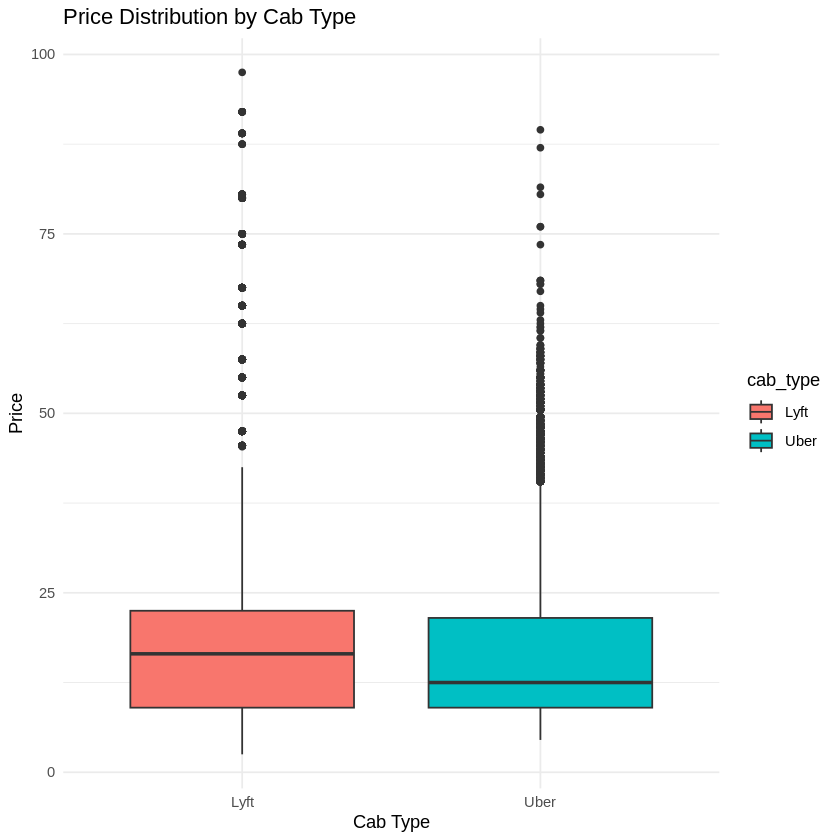

In [ ]:
library(ggplot2)

# Adjusted ggplot code for visualizing price distribution by cab_type
ggplot(cabDataSet, aes(x = cab_type, y = price, fill = cab_type)) +
  geom_boxplot() +
  labs(title = "Price Distribution by Cab Type", x = "Cab Type", y = "Price") +
  theme_minimal()


The above image offers a detailed comparative analysis of pricing structures between Lyft and Uber, utilizing a box-and-whisker plot to elegantly illustrate the distribution of fares. The delineation of prices is marked by distinctive colors—red for Lyft and teal for Uber—providing a clear visual differentiation between the two services. Notably, the plot includes outliers, represented by individual points, which signify fare instances that deviate significantly from the norm. This graph is instrumental in highlighting the variance in pricing strategies and customer cost implications associated with each service, offering valuable insights for stakeholders making informed decisions.


Warning message:
“Removed 55095 rows containing missing values or values outside the scale range
(`geom_point()`).”


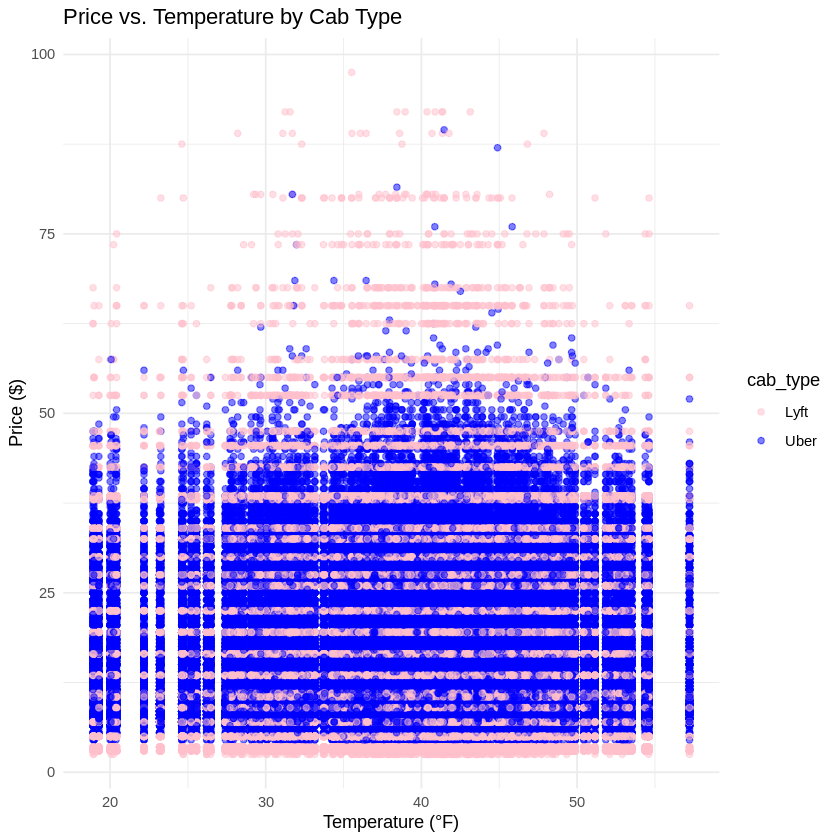

In [ ]:
ggplot(cabDataSet, aes(x = temperature, y = price)) +
  geom_point(aes(color = cab_type), alpha = 0.5) +
  labs(title = "Price vs. Temperature by Cab Type", x = "Temperature (°F)", y = "Price ($)") +
  theme_minimal() +
  scale_color_manual(values = c("Uber" = "blue", "Lyft" = "pink"))


This image is a scatter plot with the title "Price vs. Temperature by Cab Type." It plots individual data points on a graph, with the x-axis representing temperature in Fahrenheit and the y-axis representing price in US dollars. There are two different colors of data points, pink and blue, each corresponding to a different cab type as indicated by the legend: Lyft is pink, and Uber is blue.

The distribution of points shows a wide range of prices at different temperatures for both services. It seems that the prices for Lyft are more spread out over the price range, whereas Uber prices are heavily clustered at the lower end of the price range. The temperatures shown on the x-axis range from around 20°F to just over 50°F. At first glance, there doesn't seem to be a clear correlation between temperature and price for either cab type, with data points spread across the temperature range.

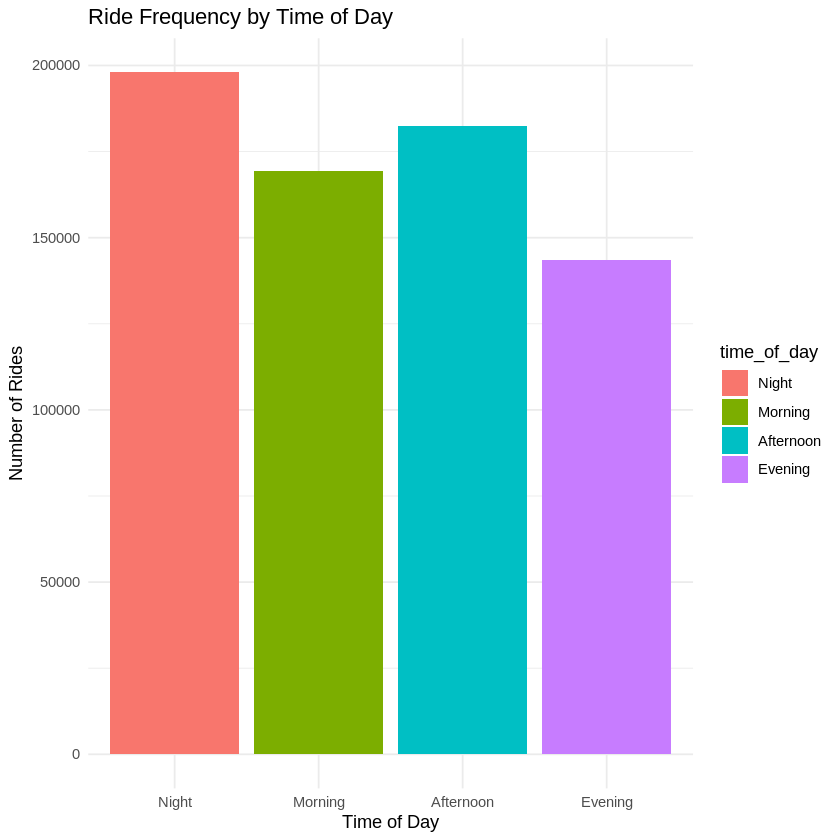

In [ ]:
library(lubridate)
library(ggplot2)

cabDataSet %>%
  mutate(datetime = ymd_hms(datetime), # Ensure datetime is in POSIXct format
         hour = hour(datetime),
         time_of_day = cut(hour, breaks = c(0, 6, 12, 18, 24),
                           labels = c("Night", "Morning", "Afternoon", "Evening"), include.lowest = TRUE)) %>%
  count(time_of_day) %>%
  ggplot(aes(x = time_of_day, y = n, fill = time_of_day)) +
  geom_col() +
  labs(title = "Ride Frequency by Time of Day", x = "Time of Day", y = "Number of Rides") +
  theme_minimal()


The above bar chart quantifies ride frequencies across various times of the day, segmented into night, morning, afternoon, and evening. Each segment is color-coded, facilitating an immediate understanding of peak and off-peak periods for ride-sharing services. This visualization serves as a crucial tool for analyzing consumer behavior and demand patterns, enabling service providers to optimize operational efficiencies and tailor their offerings to meet dynamic market requirements.


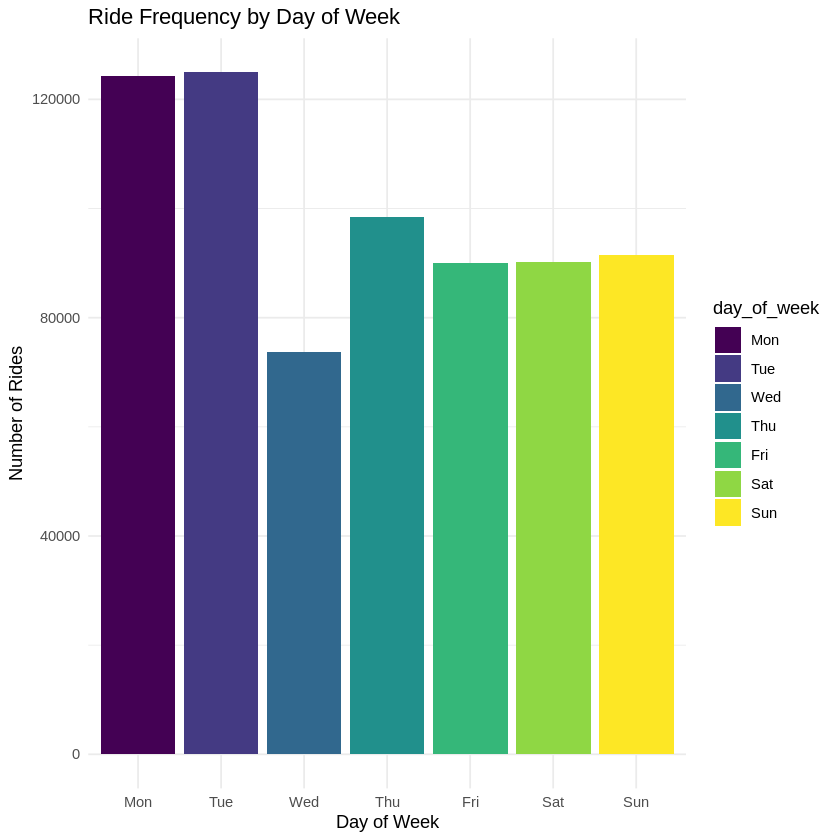

In [ ]:
cabDataSet %>%
  mutate(datetime = ymd_hms(datetime), # Convert to POSIXct format if needed
         day_of_week = wday(datetime, label = TRUE, week_start = 1)) %>% # week_start = 1 makes Monday = 1
  count(day_of_week) %>%
  ggplot(aes(x = day_of_week, y = n, fill = day_of_week)) +
  geom_col() +
  labs(title = "Ride Frequency by Day of Week", x = "Day of Week", y = "Number of Rides") +
  theme_minimal()


The above graph shows the number of rides for each day of the week. Each day is represented by a different color: Monday is dark purple, Tuesday is a lighter shade of purple, Wednesday is blue, Thursday is green, Friday is light green, Saturday is yellow, and Sunday is light yellow.

The vertical axis, labeled "Number of Rides," starts at 0 and increments by 20,000. The highest bars appear to be Monday and Tuesday, suggesting they have the highest ride frequency, both reaching around 120,000 rides. The other days show fewer rides, with the count visibly decreasing as the week progresses towards Sunday. This graph could be used to analyze the demand for ride services throughout the week.

# Exploratory Data Analysis


**Who offers the most rides,Uber or lyft?**


cab_type,Total_ Count,Percentage
<chr>,<int>,<dbl>
Lyft,307408,48.18488
Uber,330568,51.81512


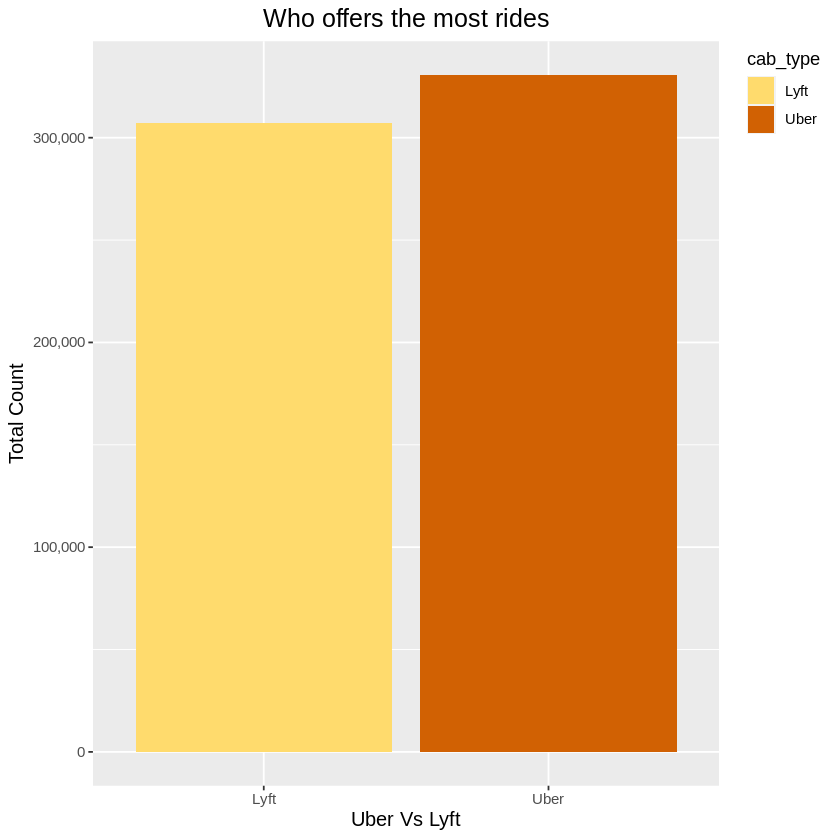

In [ ]:
 cabDataSet_distinct %>% group_by(cab_type) %>%
    summarise("Total_ Count" = length(id),
              'Percentage' = (length(id) / nrow(cabDataSet_distinct)) * 100)
bp <-ggplot()+
  geom_bar(data=cabDataSet_distinct,mapping=aes(x=cab_type, fill=cab_type))+
  scale_y_continuous(breaks = seq(0,1000000,100000),labels=scales::comma)+
  labs(x="Uber Vs Lyft",
       y="Total Count")+
  labs(title="Who offers the most rides")+
  theme(plot.title =element_text(hjust = 0.50,size=15),
        legend.justification = c("right", "top"),
       axis.title = element_text(size=12),
        axis.text = element_text(size=09))+
  theme(plot.caption=element_text(size=10))

bp + scale_fill_manual(values = c("#FFDB6D", "#D16103"))

Lyft's bar is yellow, reaching up to about 175,000 rides. Uber's bar is orange, towering at over 300,000 rides. The chart answers "Who offers the most rides" with Uber clearly in the lead.

**Lyft: Per Surge Multiplier - Total Rides vs Hour of the Day**

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


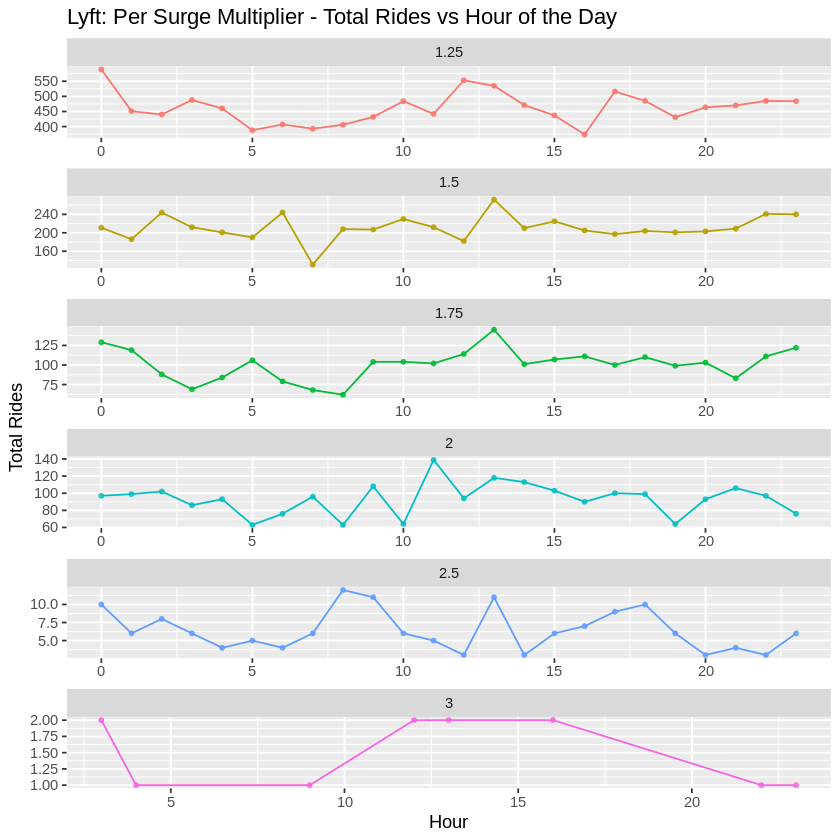

In [ ]:



surged_data <- cabDataSet %>%
        filter(cab_type == "Lyft", surge_multiplier > 1.00) %>%
        dplyr::group_by(hour, surge_multiplier) %>%
        dplyr::summarize(total_rides = n())
surged_data$surge_multiplier <- as.factor(surged_data$surge_multiplier)

lyft_surged_data <- ggplot(surged_data, aes(hour, total_rides, color = surge_multiplier)) +
        geom_point(alpha=0.8, size=1, aes(color = surge_multiplier)) +
        geom_line(aes(color = surge_multiplier)) + ggtitle("Lyft: Per Surge Multiplier - Total Rides vs Hour of the Day") +
        facet_wrap(~surge_multiplier, ncol=1, scales="free") + xlab("Hour") + ylab("Total Rides") +
        guides(color=guide_legend(ncol=1)) + theme(legend.position="none",
                                                   panel.border = element_blank(),
                                                   panel.spacing.x = unit(0,"line"))
lyft_surged_data

We've got a multi-tiered line graph titled "Lyft: Per Surge Multiplier - Total Rides vs Hour of the Day." Each line represents a surge multiplier from 1.25 to 3, each with a different color. The lines show the number of rides fluctuating throughout the day, peaking at different times depending on the surge multiplier.

**Minimum and maximum fare prices**


In [ ]:


df<-sqldf("select source ,destination, cab_type ,avg(price) as average_price,min(price) as minimun_price,max(price) as maximum_price from cabDataSet group by source, destination,cab_type order by cab_type")
CrossTable(cabDataSet$surge_multiplier, cabDataSet$cab_type)



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  693071 

 
                            | cabDataSet$cab_type 
cabDataSet$surge_multiplier |      Lyft |      Uber | Row Total | 
----------------------------|-----------|-----------|-----------|
                          1 |    286433 |    385663 |    672096 | 
                            |   456.978 |   364.253 |           | 
                            |     0.426 |     0.574 |     0.970 | 
                            |     0.932 |     1.000 |           | 
                            |     0.413 |     0.556 |           | 
----------------------------|-----------|-----------|-----------|
                       1.25 |     11085 |         0 |     11085 | 
                            |  7738.535 |  6168.307 |           | 
                     

This is a tabular comparison of Lyft and Uber across different surge multipliers. Notably, Uber dominates the no-surge scenario, while Lyft takes precedence as multipliers increase, reflecting a strategic positioning in premium pricing scenarios.



**Top 10 most Popular Stations**

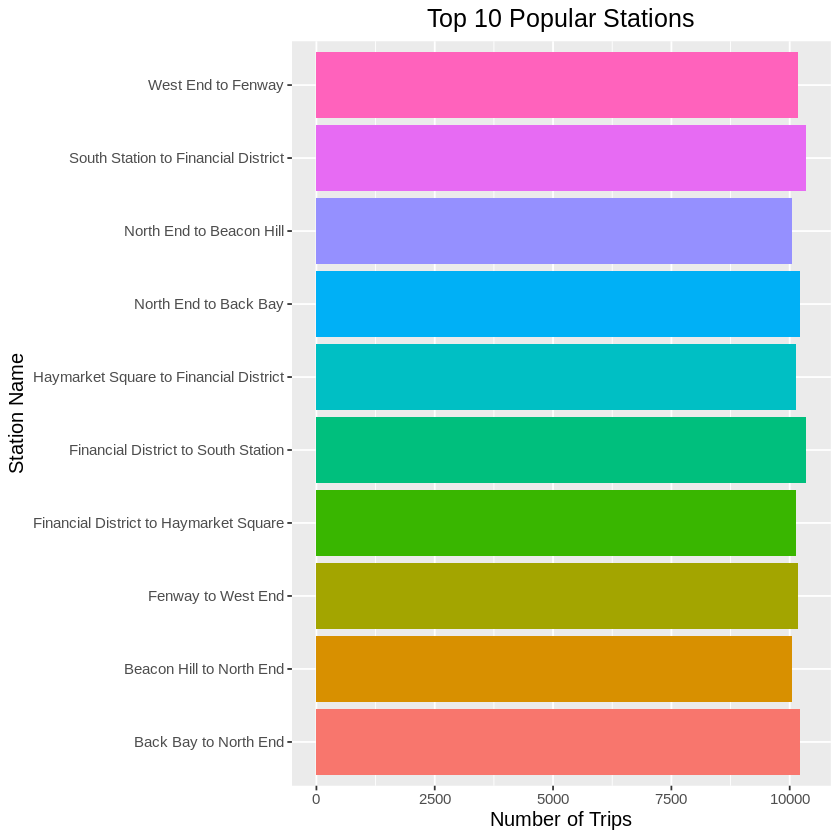

In [ ]:


popular_station<-sqldf("select source,destination,(source|| ' to ' ||destination) as station_name,count(id) as number_of_trips from cabDataSet group by source,destination order by count(id) desc LIMIT 10")
ggplot(data=popular_station,aes(x=number_of_trips, y=station_name, fill=station_name))+geom_bar(stat='identity')+
  labs(x="Number of Trips",y="Station Name")+
  labs(title=" Top 10 Popular Stations ")+
  theme(plot.title =element_text(hjust = 0.5,size=15),
        legend.position = c(2.50, .50),
        legend.justification = c("right", "top"),
       axis.title = element_text(size=12),
        axis.text = element_text(size=09))+
  theme(plot.caption=element_text(size=10))

This one's a horizontal bar chart, "Top 10 Popular Stations," with each bar a different color. The lengths vary, indicating the number of trips to each station. The longest bar is pink, for Fenway to West End, suggesting the highest number of trips.

**Weather affects the rides**

short_summary,count,Percentage
<chr>,<int>,<dbl>
Clear,80256,12.579784
Drizzle,6725,1.054115
Foggy,8292,1.299735
Light Rain,50488,7.913777
Mostly Cloudy,134603,21.098443
Overcast,201429,31.573131
Partly Cloudy,117226,18.374672
Possible Drizzle,17176,2.692264
Rain,21781,3.414078


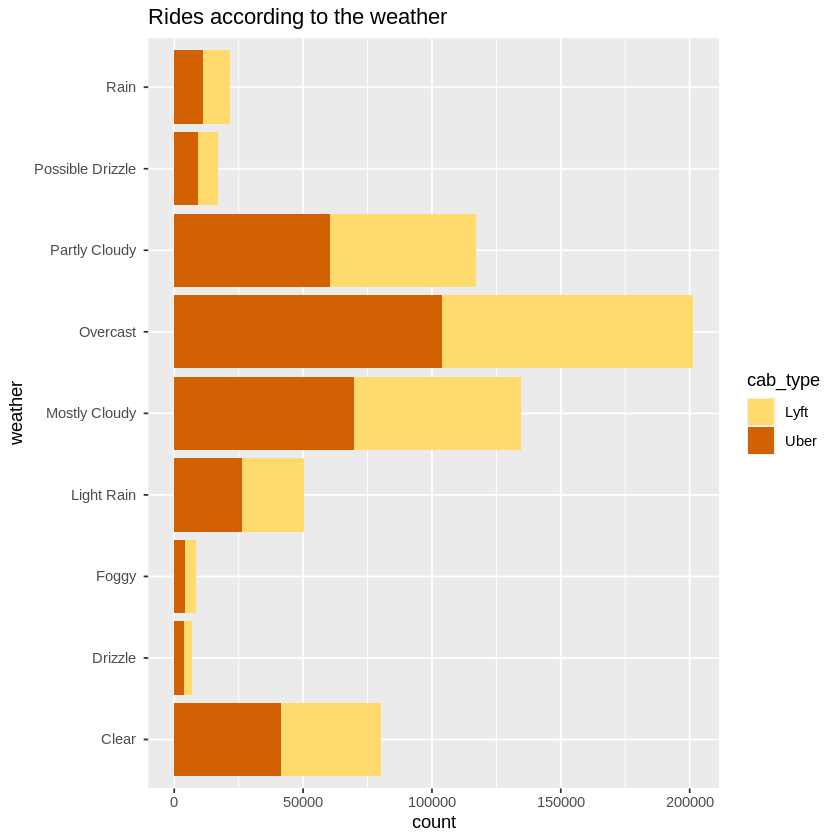

In [ ]:

cabDataSet_distinct %>% group_by(short_summary) %>%
summarise(count = length(id),'Percentage' = (length(id) / nrow(cabDataSet_distinct)) * 100)
bp <- cabDataSet_distinct %>%
    ggplot(aes(short_summary, fill=cab_type)) +
    labs(x="weather", title="Rides according to the weather") +
    geom_bar()+ coord_flip()

bp + scale_fill_manual(values = c("#FFDB6D", "#D16103"))

Bars in two shades—light for Lyft and darker for Uber—compare the total count of rides across different weather conditions. Clear days see the most rides for Uber, while Lyft peaks under "Mostly Cloudy."

**Temperature affects the ride's price**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


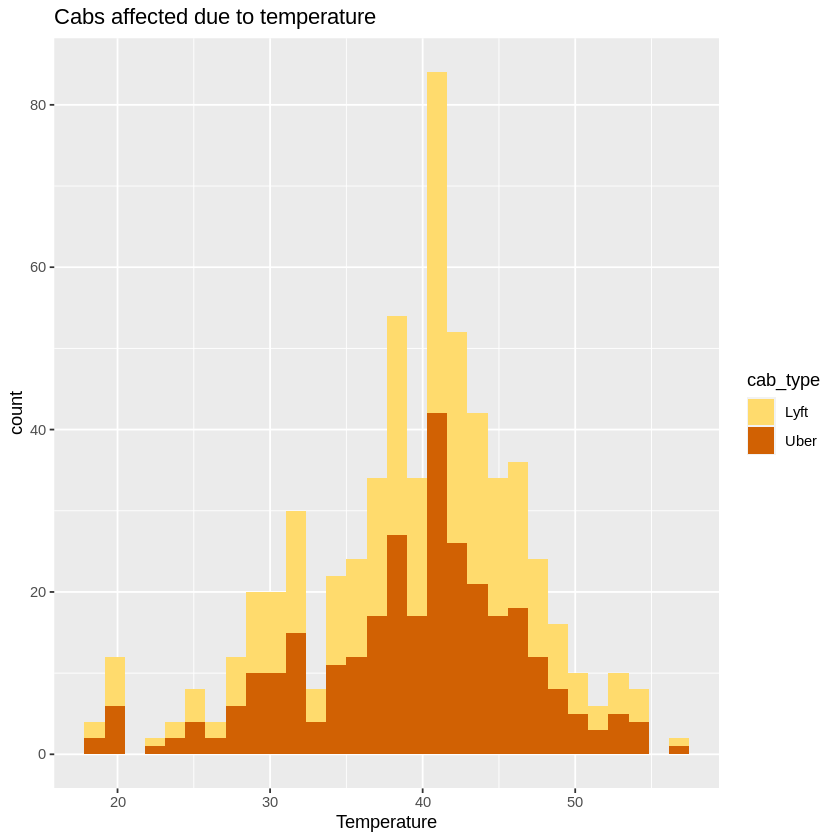

In [ ]:


df2<-sqldf("select temperature, price , cab_type from cabDataSet group by cab_type,temperature")
bp <- df2 %>%
    ggplot(aes(temperature, fill=cab_type)) +
    labs(x="Temperature", title="Cabs affected due to temperature") +
    geom_histogram()
bp + scale_fill_manual(values = c("#FFDB6D", "#D16103"))

Cabs affected due to temperature" features two overlaid histograms, one in yellow for Lyft and one in orange for Uber. The histograms show counts of rides across temperature ranges, with a noticeable spike at around 40°F for Uber.

**Weather the passengers options for cabs**

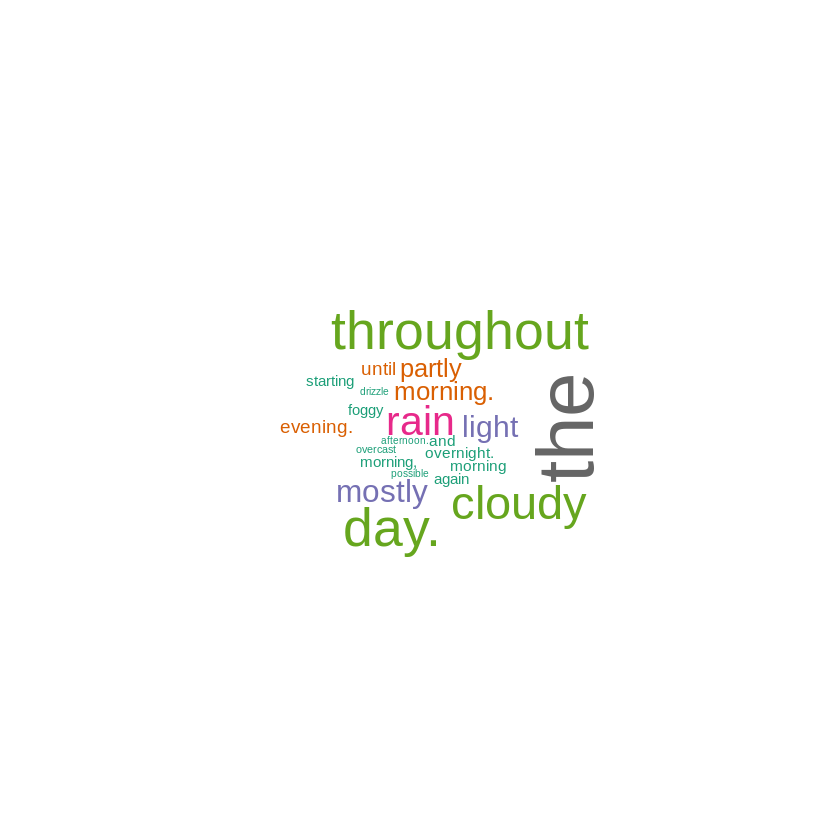

In [ ]:


document_tm <- Corpus(VectorSource(cabDataSet$long_summary))
mat <- as.matrix(TermDocumentMatrix(document_tm))
vec <- sort(rowSums(mat), decreasing = TRUE)
word_corpus <- data.frame(word = names(vec), freq = vec)
set.seed(3)
wordcloud(word_corpus$word, freq = word_corpus$freq, colors = brewer.pal(8, "Dark2"))

 It's a word cloud, with the biggest text reading "throughout" and "day." Other weather-related words like "rain," "mostly," "cloudy," and parts of the day like "morning," "evening" float around, varying in size, indicating their frequency in a dataset.

**Trips Every Hour**

[1] "hour"  "Total"

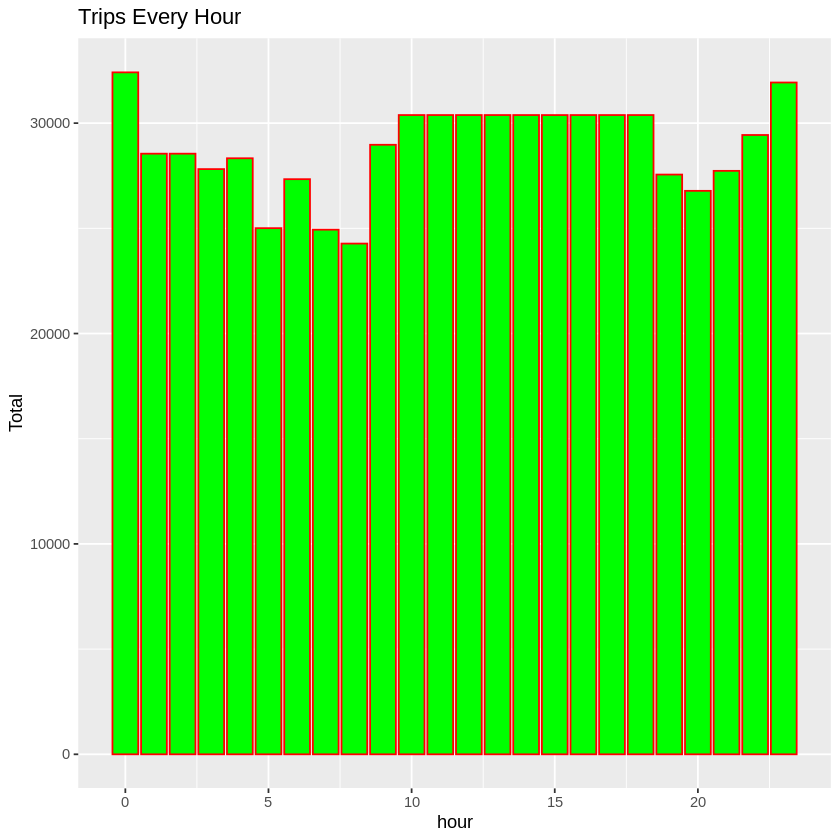

In [ ]:


hour_data <- cabDataSet %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n())

colnames(hour_data)

ggplot(hour_data, aes(hour, Total)) +
        geom_bar( stat = "identity", fill = "green", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none")

This graph depicts ride frequency across a 24-hour period. The consistent pattern suggests a stable demand with expected troughs during the early hours and peaks during traditional commuting times.

**Trips By Hour and Month**

[1] "id"                          "timestamp"                  
 [3] "hour"                        "day"                        
 [5] "month"                       "datetime"                   
 [7] "timezone"                    "source"                     
 [9] "destination"                 "cab_type"                   
[11] "product_id"                  "name"                       
[13] "price"                       "distance"                   
[15] "surge_multiplier"            "latitude"                   
[17] "longitude"                   "temperature"                
[19] "apparentTemperature"         "short_summary"              
[21] "long_summary"                "precipIntensity"            
[23] "precipProbability"           "humidity"                   
[25] "windSpeed"                   "windGust"                   
[27] "windGustTime"                "visibility"                 
[29] "temperatureHigh"             "temperatureHighTime"        
[31] "temperatureLow"              "temperatureLowTime"         
[33] "apparentTemperatureHigh"     "apparentTemperatureHighTime"
[35] "apparentTemperatureLow"      "apparentTemperatureLowTime" 
[37] "icon"                        "dewPoint"                   
[39] "pressure"                    "windBearing"                
[41] "cloudCover"                  "uvIndex"                    
[43] "visibility.1"                "ozone"                      
[45] "sunriseTime"                 "sunsetTime"                 
[47] "moonPhase"                   "precipIntensityMax"         
[49] "uvIndexTime"                 "temperatureMin"             
[51] "temperatureMinTime"          "temperatureMax"             
[53] "temperatureMaxTime"          "apparentTemperatureMin"     
[55] "apparentTemperatureMinTime"  "apparentTemperatureMax"     
[57] "apparentTemperatureMaxTime"  "month_categorical"

`summarise()` has grouped output by 'month_categorical'. You can override using
the `.groups` argument.


[1] "month_categorical" "hour"              "Total"

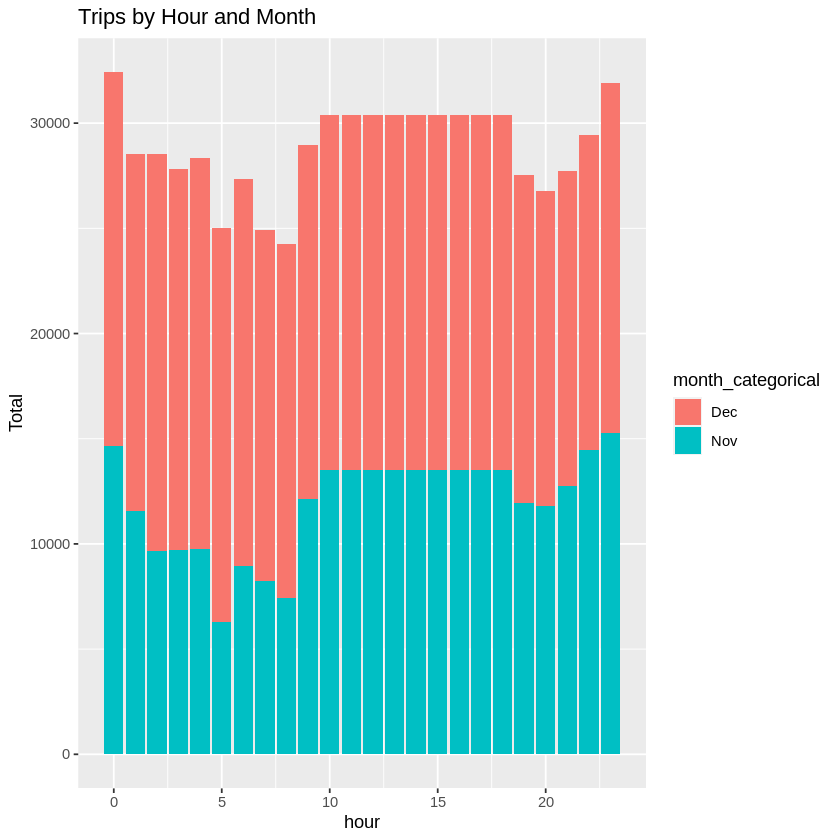

In [ ]:


df_new <- transform(cabDataSet, month_categorical =month.abb[month])
colnames(df_new)

month_hour <- df_new %>%
          group_by(month_categorical, hour) %>%
             dplyr::summarize(Total = n())
colnames(month_hour)


ggplot(month_hour, aes(hour, Total, fill = month_categorical)) +
       geom_bar(stat = "identity") +
          ggtitle("Trips by Hour and Month")

In the above bar chart, we observe the distribution of rides across hours for the months of November and December. December shows an overall increase in trip frequency, which may be attributed to holiday-related activities.

**Price range between Uber and Lyft**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.50    9.00   16.50   17.35   22.50   97.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    4.5     9.0    12.5    15.8    21.5    89.5   55095 

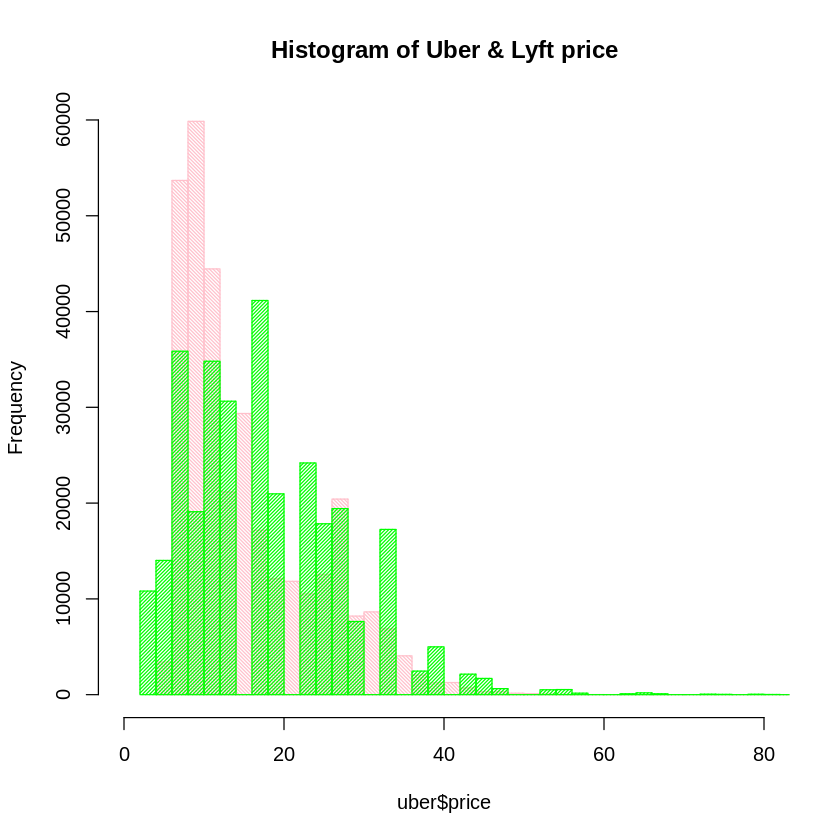

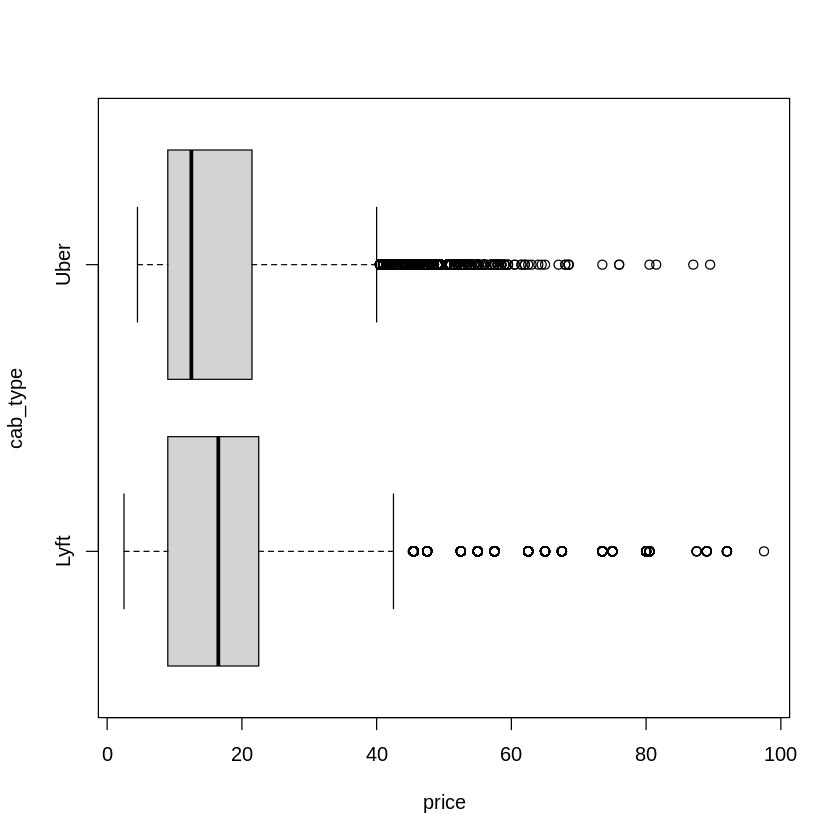

In [ ]:

lyft<-sqldf("select * from cabDataSet where cab_type='Lyft'")
uber<-sqldf("select * from cabDataSet where cab_type='Uber'")
summary(lyft$price)
summary(uber$price)
hist(uber$price, col = "pink", density = 50, angle = 135, breaks = 40, xlim = c(0,80), main = "Histogram of Uber & Lyft price")
hist(lyft$price, col = "green", density = 50, add = TRUE, breaks = 40)
boxplot(cabDataSet$price~cabDataSet$cab_type,xlab='price', ylab='cab_type', data= cabDataSet, horizontal = TRUE)

The histogram for Uber and Lyft prices indicates a higher frequency of lower-priced rides for Lyft, whereas Uber displays a broader distribution across the price range. This suggests a potential market segmentation where Lyft captures more of the budget-conscious consumer base.

The boxplot diagram provides a comparative overview of ride pricing structures between Lyft and Uber. Both display a range of outliers, with Lyft's interquartile range shifted towards a higher price point, indicating a generally higher median price relative to Uber.

**Heatmap for specific location and hours**

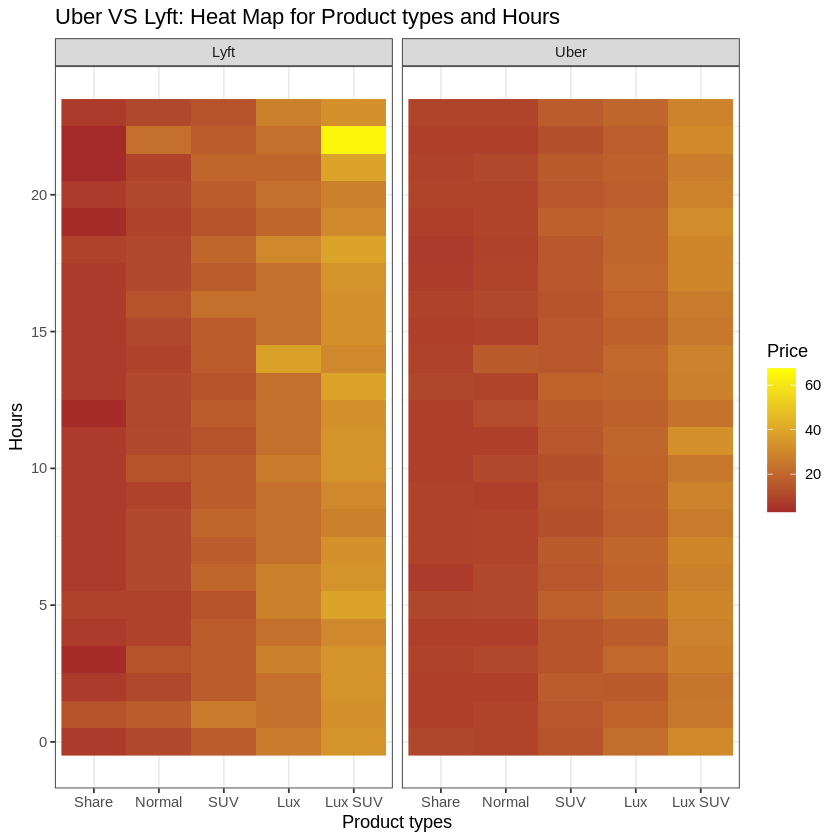

In [ ]:


bt<-cabDataSet %>% select(price,cab_type,name,distance,short_summary,hour,source,destination) %>% filter(name!="WAV") %>% filter(name!="Lux") %>% filter(price>=0)
bt$name_f<-factor(bt$name,
                            levels=c("UberPool","Shared","UberX","Lyft","UberXL","Lyft XL","Black","Lux Black","Black SUV","Lux Black XL"))
levels(bt$name_f) <- list("Share" = c("UberPool","Shared"),
                             "Normal" =  c("UberX","Lyft"),
                             "SUV" = c("UberXL","Lyft XL"),
                             "Lux" = c("Black","Lux Black"),
                             "Lux SUV"= c("Black SUV","Lux Black XL"))

bt<-bt %>% select(price,cab_type,name,name_f,distance,short_summary,hour,source,destination) %>% filter(name!="WAV") %>% filter(name!="Lux") %>% filter(price>=0)
bt1<-bt %>% select(price,cab_type,name_f,hour,source, destination) %>% filter(destination=="Northeastern University") %>% filter(source=="Theatre District")  %>% filter(price>=0)
ggplot(bt1, aes(name_f,hour ))+
  geom_raster(aes(fill = price))+
  scale_fill_gradientn(colours=c("brown","yellow"),name="Price")+
  labs(title ="Uber VS Lyft: Heat Map for Product types and Hours", x = "Product types", y = "Hours")+
  theme_bw()+facet_wrap(~cab_type)

The heat map for product types and hours offers a visual representation of pricing patterns across different service levels and times of the day. Higher prices during late-night hours are apparent for both services, highlighting peak pricing trends.

In [ ]:
numericalDataClean <- na.omit(numericalData)

In [ ]:
numericalDataImputed <- numericalData
for(i in 1:ncol(numericalDataImputed)){
  numericalDataImputed[is.na(numericalDataImputed[,i]), i] <- mean(numericalDataImputed[,i], na.rm = TRUE)
}


In [ ]:
# Loop through each column in the data frame
for(i in seq_along(numericalDataImputed)) {
  # Check if the column is numeric
  if(is.numeric(numericalDataImputed[[i]])) {
    # Replace infinite values with NA
    numericalDataImputed[[i]][is.infinite(numericalDataImputed[[i]])] <- NA
  }
}


**Clustering and Dimensionality Reduction**

**Principal Component Analysis**


In [ ]:
pcaResult <- prcomp(numericalDataImputed, center = TRUE, scale. = TRUE, na.action = na.omit)


Warning message:
“In prcomp.default(numericalDataImputed, center = TRUE, scale. = TRUE, 
    na.action = na.omit) :
 extra argument ‘na.action’ will be disregarded”


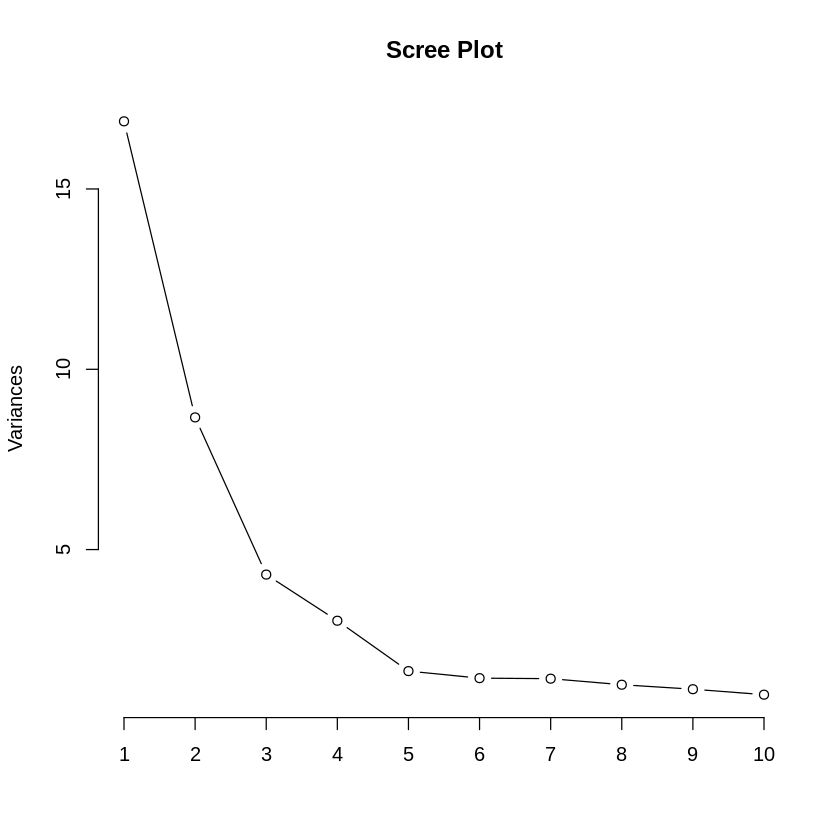

In [ ]:
plot(pcaResult, type = "l", main = "Scree Plot")

The scree plot in the image visually represents the variance explained by each of the first ten principal components from a Principal Component Analysis (PCA). The plot highlights a steep decline in the variance explained after the first principal component, with a noticeable but less sharp drop following the second component, suggesting the majority of the data's variance is captured by these initial components. The variance levels off considerably from the fourth component onwards, indicating minimal additional information gained by retaining further components. This pattern suggests that the first two or three components are sufficient to capture the most significant variance within the data, adhering to the elbow method commonly used in PCA to decide on the number of components to retain. The plot effectively communicates the diminishing returns in variance explained with each subsequent principal component, guiding the reduction of dimensionality while preserving the essence of the dataset's variability.

# **Model Training**

In the pursuit of an optimal predictive model for ride-sharing prices, we have employed three distinct statistical learning methods: Linear Regression, Decision Trees, and Random Forest. The following is a detailed analysis of the model selection process for both Uber and Lyft datasets.



In [ ]:
## Data Modelling


### Loading pre processed Data and factoring required columns
### Split data to train and test


weekday <- weekdays(as.POSIXlt(cabDataSet$datetime), abbreviate = TRUE)

cabDataSet['Fri'] = as.integer(weekday=='Fri')
cabDataSet['Sat'] = as.integer(weekday=='Sat')
cabDataSet['Sun'] = as.integer(weekday=='Sun')

#change short Summary of weather to binary variables
ss_data <- unique(cabDataSet$short_summary)
for (i in ss_data)
      {
        cabDataSet[i] = as.integer(cabDataSet$name == i)

       }

for (p in unique(cabDataSet$name))
      {
          cabDataSet[p] = as.integer(cabDataSet$name == p)
      }

lyft<-sqldf("select [distance],[surge_multiplier],[Fri], [Sat],[Sun],[Shared],[Lyft XL],[Lux Black XL], [LUX],[Lux Black],[ Mostly Cloudy ], [ Rain ], [ Partly Cloudy ],[ Overcast ], [ Light Rain ], [ Foggy ], [ Possible Drizzle ],[ Drizzle ], price from cabDataSet where cab_type='Lyft'")
uber<-sqldf("select [distance],[surge_multiplier],[Fri], [Sat],[Sun],[UberPool],[UberXL],[Black],[Black SUV], [WAV],[ Mostly Cloudy ], [ Rain ], [ Partly Cloudy ],[ Overcast ], [ Light Rain ], [ Foggy ], [ Possible Drizzle ],[ Drizzle ], price from cabDataSet where cab_type='Uber'")

colnames(uber)[9] ="Black_SUV"
colnames(uber)[11] ="Mostly_Cloudy"
colnames(uber)[12] ="Rain"
colnames(uber)[13] ="Partly_Cloudy"
colnames(uber)[14] ="Overcast"
colnames(uber)[15] ="Light_Rain"
colnames(uber)[16] ="Foggy"
colnames(uber)[17] ="Possible_Drizzle"
colnames(uber)[18] ="Drizzle"


colnames(lyft)[7] ="Lyft_XL"
colnames(lyft)[8] ="Lux_Black_XL"
colnames(lyft)[10] ="Lux_Black"
colnames(lyft)[11] ="Mostly_Cloudy"
colnames(lyft)[12] ="Rain"
colnames(lyft)[13] ="Partly_Cloudy"
colnames(lyft)[14] ="Overcast"
colnames(lyft)[15] ="Light_Rain"
colnames(lyft)[16] ="Foggy"
colnames(lyft)[17] ="Possible_Drizzle"
colnames(lyft)[18] ="Drizzle"

#Uber
#selecting on numeric data
numericIndex = sapply(uber,is.numeric)
numericData = uber[,numericIndex]

#divide into train & test
trainingIndex = sample(1:nrow(uber), 0.9 * nrow(uber))
uberTraining = uber[trainingIndex,]
uberTesting = uber[-trainingIndex,]

uberTraining<-na.omit(uberTraining)
sapply(uberTraining, function(x) sum(is.na(x)))

uberTesting <- na.omit(uberTesting)
sapply(uberTesting, function(x) sum(is.na(x)))

#lyft
#selecting on numeric data
numericIndex = sapply(lyft,is.numeric)
numericData = uber[,numericIndex]

#divide into train & test
trainingIndex = sample(1:nrow(lyft), 0.9 * nrow(lyft))
lyftTraining = lyft[trainingIndex,]
lyftTesting = lyft[-trainingIndex,]

lyftTraining<-na.omit(lyftTraining)
sapply(lyftTraining, function(x) sum(is.na(x)))

lyftTesting<-na.omit(lyftTesting)
sapply(lyftTesting, function(x) sum(is.na(x)))

distance surge_multiplier              Fri              Sat 
               0                0                0                0 
             Sun         UberPool           UberXL            Black 
               0                0                0                0 
       Black_SUV              WAV    Mostly_Cloudy             Rain 
               0                0                0                0 
   Partly_Cloudy         Overcast       Light_Rain            Foggy 
               0                0                0                0 
Possible_Drizzle          Drizzle            price 
               0                0                0

distance surge_multiplier              Fri              Sat 
               0                0                0                0 
             Sun         UberPool           UberXL            Black 
               0                0                0                0 
       Black_SUV              WAV    Mostly_Cloudy             Rain 
               0                0                0                0 
   Partly_Cloudy         Overcast       Light_Rain            Foggy 
               0                0                0                0 
Possible_Drizzle          Drizzle            price 
               0                0                0

distance surge_multiplier              Fri              Sat 
               0                0                0                0 
             Sun           Shared          Lyft_XL     Lux_Black_XL 
               0                0                0                0 
             Lux        Lux_Black    Mostly_Cloudy             Rain 
               0                0                0                0 
   Partly_Cloudy         Overcast       Light_Rain            Foggy 
               0                0                0                0 
Possible_Drizzle          Drizzle            price 
               0                0                0

distance surge_multiplier              Fri              Sat 
               0                0                0                0 
             Sun           Shared          Lyft_XL     Lux_Black_XL 
               0                0                0                0 
             Lux        Lux_Black    Mostly_Cloudy             Rain 
               0                0                0                0 
   Partly_Cloudy         Overcast       Light_Rain            Foggy 
               0                0                0                0 
Possible_Drizzle          Drizzle            price 
               0                0                0

## **Linear Regression Model**

**For Uber:**

The linear model (uberLMModel) was assessed using the summary() function, providing coefficients, R-squared, and other diagnostic measures. The model's predictions were generated with the predict() function on the testing dataset. The correlation between actual prices and predicted values was computed, yielding a correlation matrix that reflects the strength and direction of the linear relationship. The Mean Absolute Percentage Error (MAPE) was calculated to estimate the accuracy of the model, resulting in an accuracy metric for the Uber linear regression model.

**For Lyft:**

A similar approach was taken with the Lyft data, training lyft_lm_model and predicting on the test set. The correlation and accuracy were computed in an identical manner, allowing for direct comparison between the two services.




Call:
lm(formula = price ~ ., data = uberTraining)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.648  -1.420  -0.283   1.074  54.892 

Coefficients: (9 not defined because of singularities)
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       4.407800   0.014150  311.500   <2e-16 ***
distance          2.445569   0.003772  648.374   <2e-16 ***
surge_multiplier        NA         NA       NA       NA    
Fri              -0.022536   0.013601   -1.657   0.0975 .  
Sat               0.012649   0.013599    0.930   0.3523    
Sun              -0.031185   0.013512   -2.308   0.0210 *  
UberPool         -1.003611   0.015404  -65.151   <2e-16 ***
UberXL            5.915176   0.015413  383.776   <2e-16 ***
Black            10.773591   0.015407  699.253   <2e-16 ***
Black_SUV        20.529696   0.015424 1331.030   <2e-16 ***
WAV               0.002248   0.015417    0.146   0.8841    
Mostly_Cloudy           NA         NA       NA       NA    
Rain              

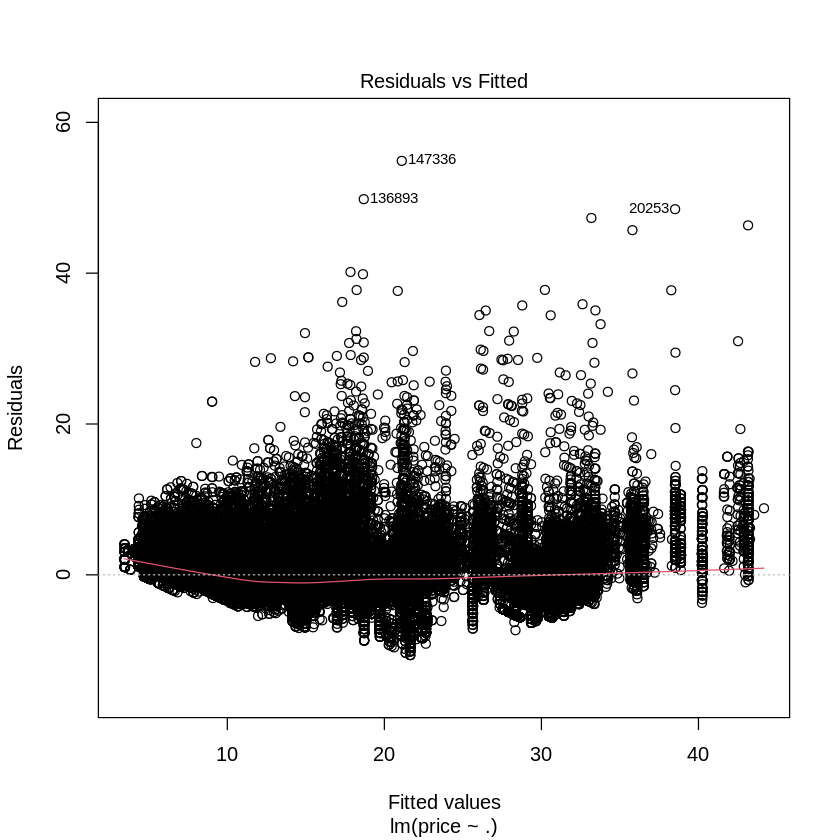

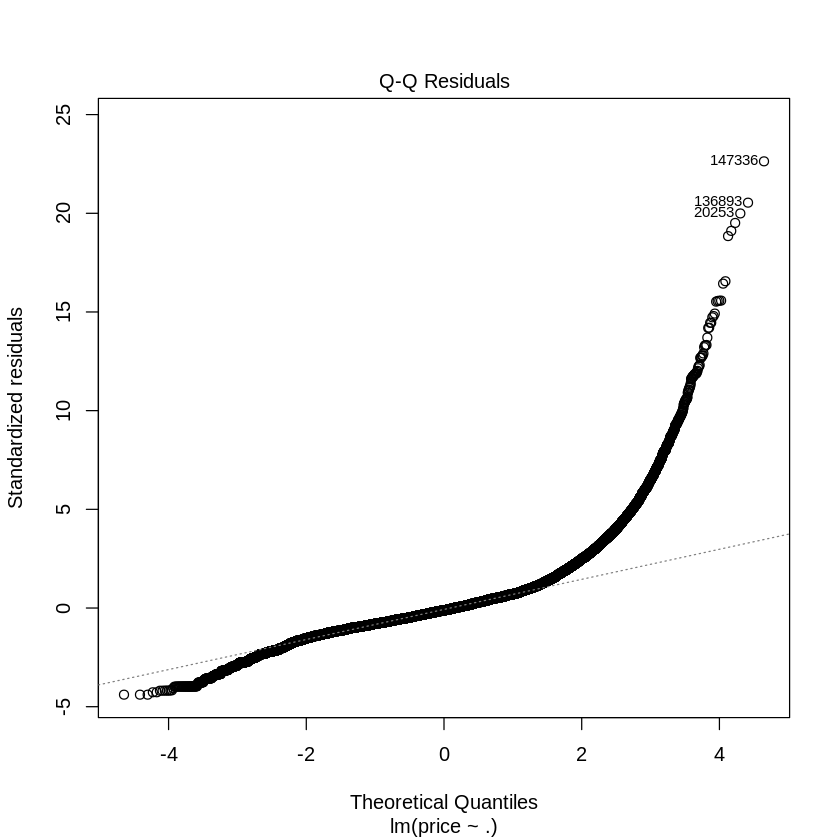

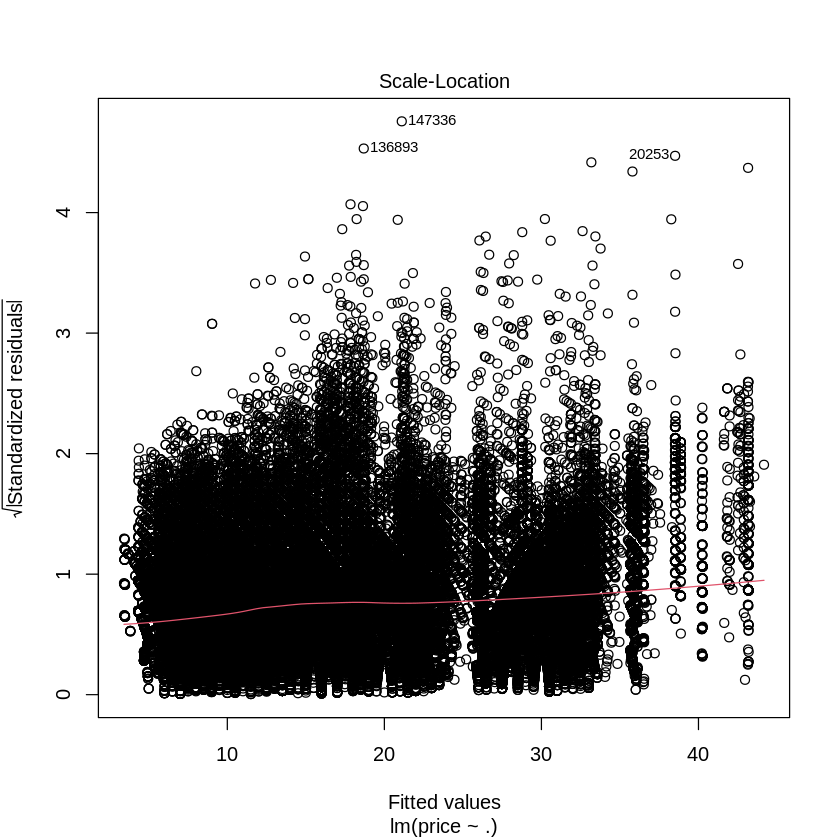

,actuals,predicteds
actuals,1.0000000,0.9591117
predicteds,0.9591117,1.0000000


      mae       mse      rmse      mape 
1.6697108 5.8347082 2.4155141 0.1191017 


[1] "The Accuracy of Linear Regression for Uber :88.089834"


Call:
lm(formula = price ~ ., data = lyftTraining)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.744  -1.417  -0.165   1.422  40.354 

Coefficients: (8 not defined because of singularities)
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      -1.640e+01  3.988e-02 -411.217   <2e-16 ***
distance          3.243e+00  4.428e-03  732.461   <2e-16 ***
surge_multiplier  1.822e+01  3.568e-02  510.849   <2e-16 ***
Fri              -1.054e-02  1.467e-02   -0.719    0.472    
Sat               1.304e-02  1.465e-02    0.890    0.374    
Sun               7.566e-04  1.461e-02    0.052    0.959    
Shared           -2.895e+00  1.670e-02 -173.332   <2e-16 ***
Lyft_XL           5.696e+00  1.666e-02  341.886   <2e-16 ***
Lux_Black_XL      2.273e+01  1.666e-02 1363.977   <2e-16 ***
Lux               8.171e+00  1.665e-02  490.736   <2e-16 ***
Lux_Black         1.347e+01  1.665e-02  808.881   <2e-16 ***
Mostly_Cloudy            NA         NA       NA       NA    
Rain 

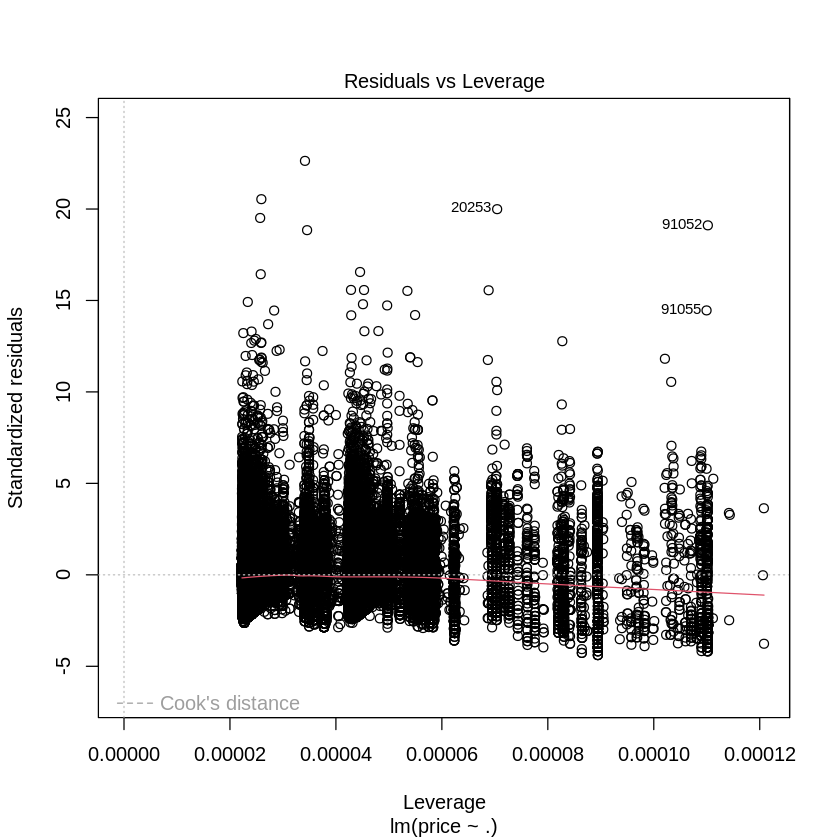

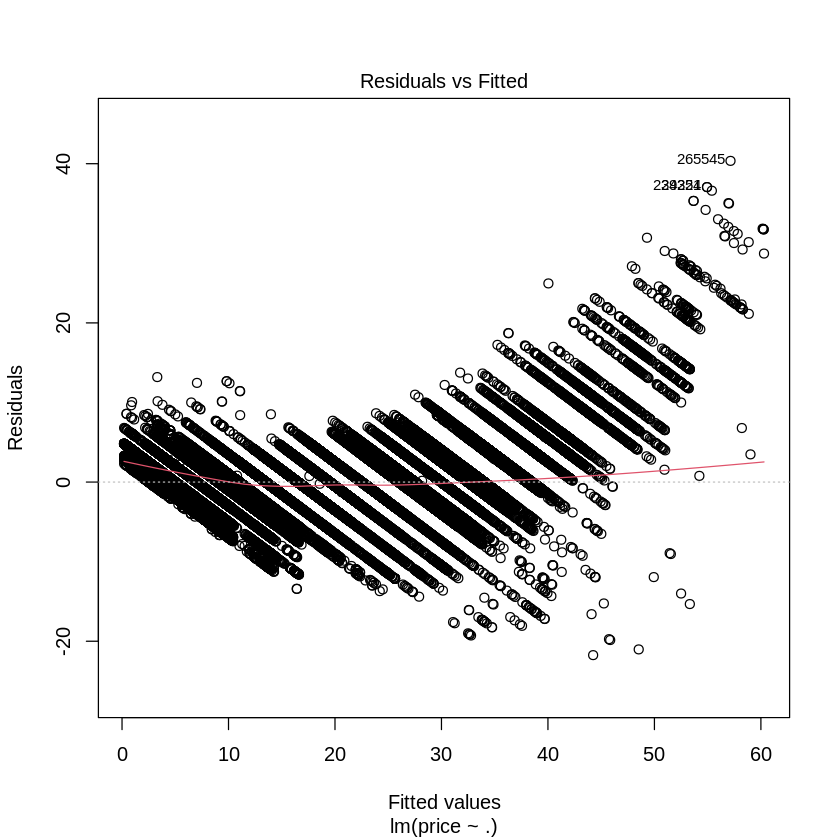

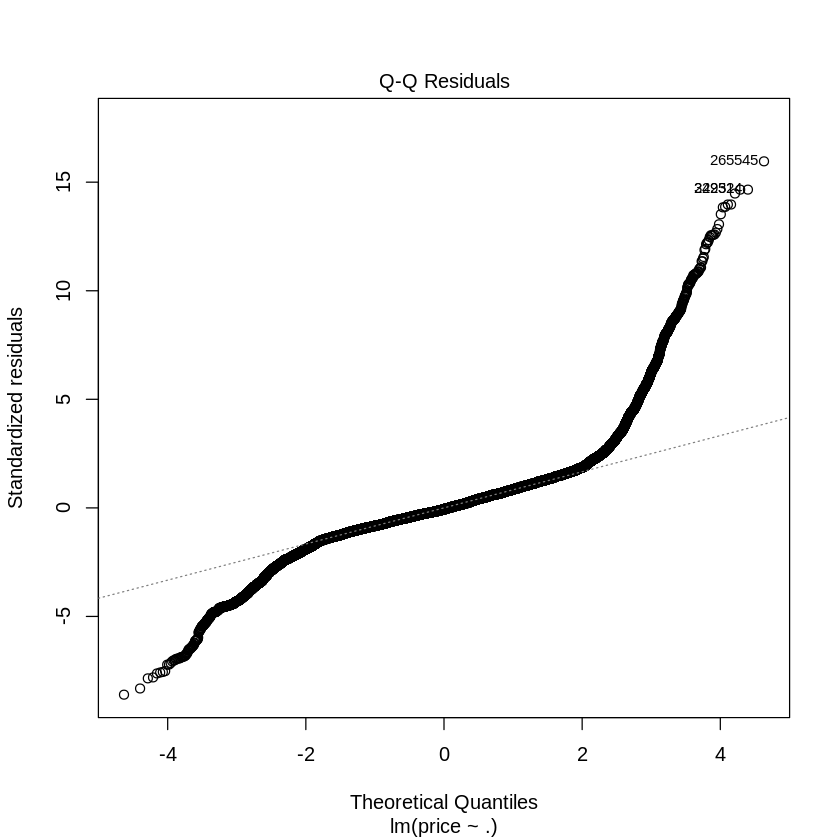

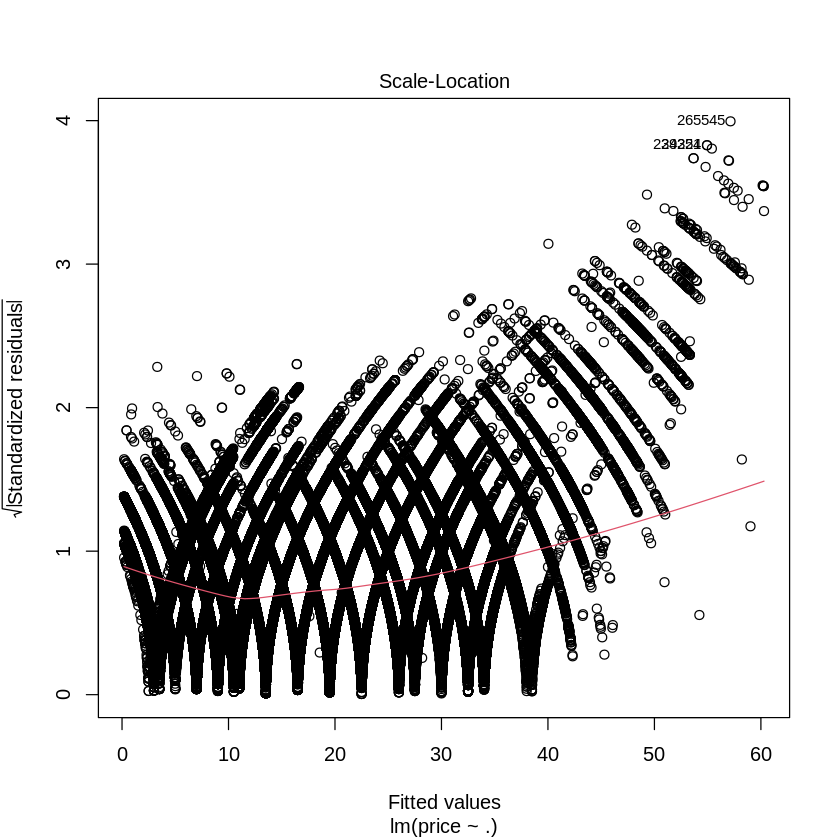

,actuals,predicteds
actuals,1.0000000,0.9683375
predicteds,0.9683375,1.0000000


      mae       mse      rmse      mape 
1.8068009 6.2327136 2.4965403 0.1493054 


[1] "The Accuracy of Linear Regression for Lyft :85.069462"

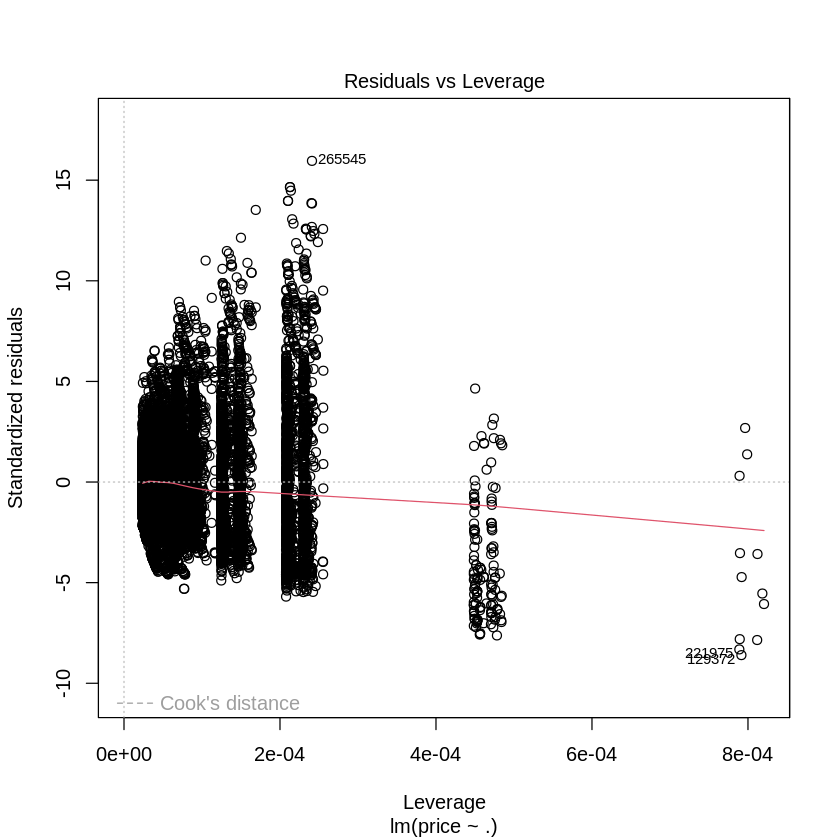

In [ ]:
### Linear Regression

#Uber
uberLMModel = lm(price ~., data = uberTraining)
summary(uberLMModel)
plot (uberLMModel)


#prediction
uberPrediction = predict(uberLMModel, uberTesting[,1:18])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=uberTesting$price, predicteds=uberPrediction))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_lr_uber<- regr.eval(uberTesting[,19], uberPrediction)#, stats = c('mape','rmse'))
print(mat_lr_uber)

errors = abs(uberPrediction - uberTesting$price)
mape = 100 * (errors / uberTesting$price)
uber_lr_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Linear Regression for Uber :%f",uber_lr_accuracy)

#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

#lyft
lyft_lm_model = lm(price ~., data = lyftTraining)
summary(lyft_lm_model)
plot(lyft_lm_model)

#prediction
lyft_pred = predict(lyft_lm_model, lyftTesting[,1:18])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=lyftTesting$price, predicteds=lyft_pred))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_lr_lyft<- regr.eval(lyftTesting[,19], lyft_pred)#, stats = c('mape','rmse'))
print(mat_lr_lyft)
errors = abs(lyft_pred - lyftTesting$price)
mape = 100 * (errors / lyftTesting$price)
lyft_lr_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Linear Regression for Lyft :%f",lyft_lr_accuracy)

The `lm` function in R is used to construct linear regression models (`uberLMModel` and `lyft_lm_model`) for both Uber and Lyft, taking all available variables in the training datasets as predictors for the price. The summary of these models likely provides coefficients for each predictor, along with statistics such as R-squared and p-values that indicate the goodness of fit and the significance of each predictor.

Predictions are then made on the test datasets, and a correlation matrix between actual prices and predicted values is computed. A high correlation would indicate that the model is capturing the underlying pattern effectively. However, considering the diagnostic plots, particularly for residuals, suggests the presence of heteroscedasticity (non-constant variance of residuals) and potential outliers. These plots signal the need for caution, as they can imply model misspecification, meaning that the relationships between predictors and the response variable might not be purely linear, or that influential points are affecting the model disproportionately.

The `regr.eval` function appears to compute performance metrics such as MAE, MSE, and possibly RMSE and MAPE, although only the latter is used in your accuracy calculations. The accuracy is derived from the MAPE, which represents the average percentage error across all predictions. The reported accuracies—88.09% for Uber and 85.06% for Lyft—are respectable but should be contextualized with the diagnostic findings. The presence of outliers, indicated by the plots, and potential leverage points could be skewing the models' performances, which implies that while the models predict prices fairly well on average, individual predictions may still be off, particularly for price points that are not well represented in the training data.

The diagnostic plots—Residuals vs. Fitted, Q-Q, Scale-Location, and Residuals vs. Leverage—serve to check the assumptions underlying linear regression. The patterns in these plots suggest that the linear models could be improved, perhaps by addressing the non-linearity through transformations or adding interaction terms, or by using robust regression methods to diminish the influence of outliers.

In conclusion, while the linear regression models provide a good starting point and exhibit high average accuracy.

## **Decision Tree Model**

Decision trees were constructed using the rpart function with an ANOVA method, aiming to create a hierarchical structure for prediction.

**For Uber:**

The Uber decision tree model (uber_rpart_model) was summarized and pruned based on the complexity parameter (CP) that minimized cross-validated error. The pruned tree was visualized using prp(). Predictions were made on the test dataset and evaluated for correlation and accuracy using MAPE, similar to the linear regression model.

**For Lyft:**

Lyft's decision tree model followed the same procedure, with a tree (lyft_rpart_model) built, pruned, and evaluated on the test data to ascertain the accuracy and predictive capabilities.



Call:
rpart(formula = price ~ ., data = uberTraining, method = "anova")
  n= 297510 

          CP nsplit  rel error     xerror         xstd
1 0.57182252      0 1.00000000 1.00001009 0.0028723813
2 0.16623160      1 0.42817748 0.42818237 0.0016622376
3 0.06681990      2 0.26194589 0.26195252 0.0012964846
4 0.03144997      3 0.19512599 0.19513268 0.0010827101
5 0.02763747      4 0.16367602 0.16368297 0.0010058718
6 0.01931217      5 0.13603855 0.13604616 0.0008734574
7 0.01245846      6 0.11672639 0.11673341 0.0007865145
8 0.01026684      7 0.10426792 0.10427501 0.0007714845
9 0.01000000      8 0.09400108 0.09525306 0.0007232491

Variable importance
Black_SUV     Black  distance    UberXL 
       63        18        11         7 

Node number 1: 297510 observations,    complexity param=0.5718225
  mean=15.7961, MSE=73.33058 
  left son=2 (248034 obs) right son=3 (49476 obs)
  Primary splits:
      Black_SUV < 0.5   to the left,  improve=0.57182250, (0 missing)
      UberPool  < 0.5   to

,actuals,predicteds
actuals,1.0000000,0.9520703
predicteds,0.9520703,1.0000000


      mae       mse      rmse      mape 
1.7995829 6.8132767 2.6102254 0.1230596 


[1] "The Accuracy of Decision Tree for Uber :87.694036"

Call:
rpart(formula = price ~ ., data = lyftTraining, method = "anova")
  n= 276667 

           CP nsplit rel error    xerror         xstd
1  0.44585340      0 1.0000000 1.0000058 0.0035430159
2  0.15776524      1 0.5541466 0.5541521 0.0023072276
3  0.08367959      2 0.3963814 0.3963891 0.0019125673
4  0.03891566      3 0.3127018 0.3127098 0.0018211360
5  0.03231274      4 0.2737861 0.2738188 0.0017487835
6  0.03101511      5 0.2414734 0.2416787 0.0016521927
7  0.02459246      6 0.2104583 0.2106961 0.0014428580
8  0.02088014      7 0.1858658 0.1860868 0.0014020353
9  0.01746894      8 0.1649857 0.1651956 0.0013715584
10 0.01156837      9 0.1475167 0.1477901 0.0010403555
11 0.01103924     10 0.1359484 0.1353521 0.0008943156
12 0.01000000     11 0.1249091 0.1261764 0.0007299040

Variable importance
    Lux_Black_XL        Lux_Black         distance           Shared 
              51               18               12               10 
surge_multiplier              Lux          Lyft_XL 
 

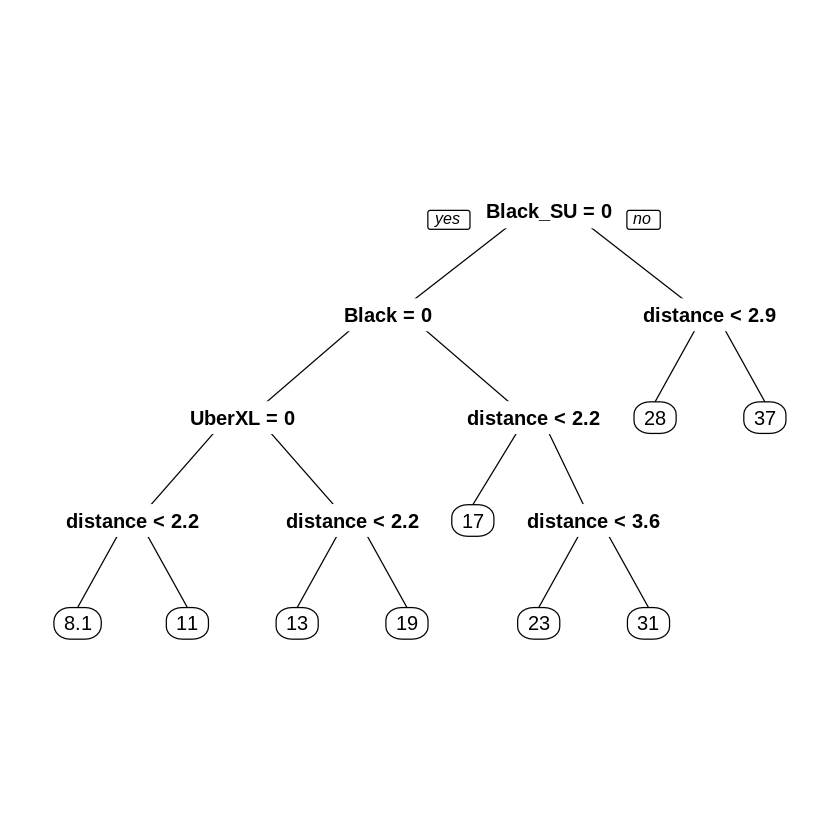

,actuals,predicteds
actuals,1.0000000,0.9348973
predicteds,0.9348973,1.0000000


       mae        mse       rmse       mape 
 2.6463307 12.5978293  3.5493421  0.1969981 


[1] "The Accuracy of Decision Tree for Lyft :80.300189"

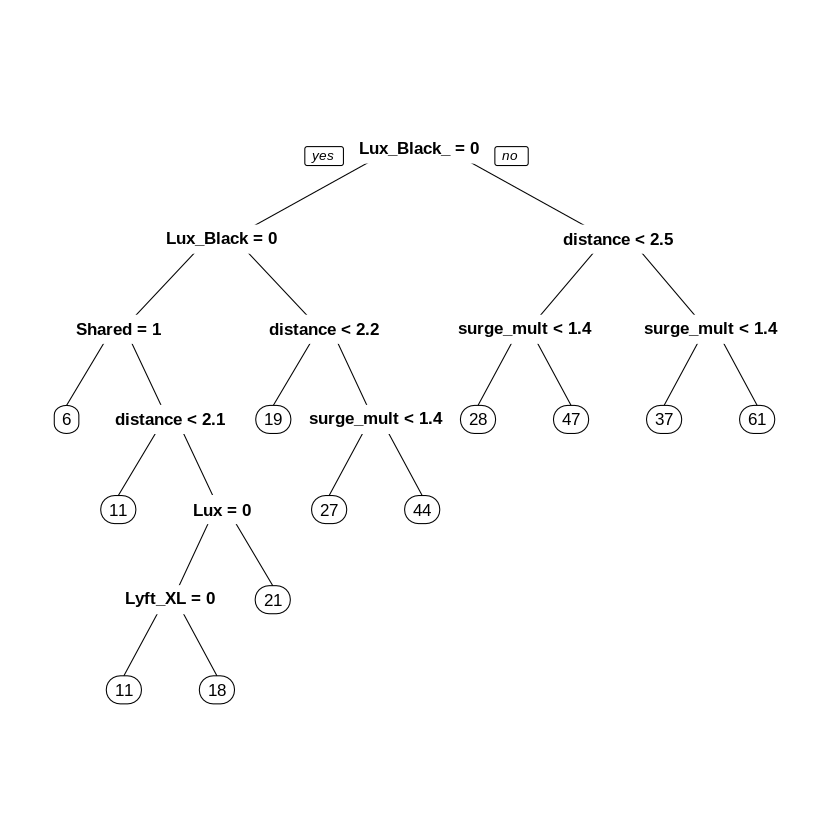

In [ ]:
### Decision Tree

#Uber
uber_rpart_model = rpart(price ~., data = uberTraining, method="anova")
summary(uber_rpart_model)
#identify best cp value to use
best <- uber_rpart_model$cptable[which.min(uber_rpart_model$cptable[,"xerror"]),"CP"]

#produce a pruned tree based on the best cp value
pruned_tree <- prune(uber_rpart_model, cp=best)

#plot the pruned tree
prp(pruned_tree)

#prediction
uberPrediction_rpart = predict(uber_rpart_model, uberTesting[,-19])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=uberTesting$price, predicteds=uberPrediction_rpart))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_dt_uber<- regr.eval(uberTesting[,19], uberPrediction_rpart)#, stats = c('mape','rmse'))
print(mat_dt_uber)
errors = abs(uberPrediction_rpart - uberTesting$price)
mape = 100 * (errors / uberTesting$price)
uber_dt_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Decision Tree for Uber :%f",uber_dt_accuracy)
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

# lyft
lyft_rpart_model = rpart(price ~., data = lyftTraining, method="anova")
summary(lyft_rpart_model)

#identify best cp value to use
best <- lyft_rpart_model$cptable[which.min(lyft_rpart_model$cptable[,"xerror"]),"CP"]
#produce a pruned tree based on the best cp value
pruned_tree <- prune(lyft_rpart_model, cp=best)

#plot the pruned tree
prp(pruned_tree)

#prediction
lyft_pred_rpart = predict(lyft_rpart_model, lyftTesting[,-19])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=lyftTesting$price, predicteds=lyft_pred_rpart))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_dt_lyft<- regr.eval(lyftTesting[,19], lyft_pred_rpart)#, stats = c('mape','rmse'))
print(mat_dt_lyft)
errors = abs(lyft_pred_rpart - lyftTesting$price)
mape = 100 * (errors / lyftTesting$price)
lyft_dt_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Decision Tree for Lyft :%f",lyft_dt_accuracy)

The decision tree models for Uber and Lyft, generated using the `rpart` function in R with an ANOVA method, present a detailed and intricate analysis of the factors affecting ride prices. The output and tree structures offer a granular look into how various features influence price predictions.

For Uber, the decision tree indicates that the 'Black_SUV' variable is the most important predictor, followed by 'Black' and 'distance'. The primary split is on the 'Black_SUV' variable, suggesting that this service type significantly impacts the price. As we move through the nodes, we observe splits on different days of the week, which indicates variability in prices depending on the day. This could be due to demand fluctuations throughout the week.

The complexity parameter (`cp`) in the decision tree indicates the cost-complexity trade-off in tree pruning, with smaller values of `cp` resulting in larger trees. The chosen `cp` values lead to different sizes of the trees for Uber and Lyft, aiming to find the right balance between underfitting and overfitting.

The mean and the mean squared error (MSE) at each node provide insight into the prediction at that point and the variability around it. The reduction in MSE from the root node down to the subsequent nodes illustrates the improvement in prediction accuracy as we add more decision criteria.

For Lyft, the decision tree showcases 'Lux_Black_XL', 'Lux_Black', and 'distance' as top variables impacting price, aligning with the premium nature of these service types. The splits based on 'surge_multiplier' also highlight the impact of demand on pricing strategies.

The accuracy of the decision trees, around 87.69% for Uber and 80.30% for Lyft, while respectable, does reflect that there is room for improvement, especially when considering the variability of the MSE across nodes. The more significant MSE in some nodes suggests regions of the feature space where the model's predictions are less reliable.

Visual inspection of the tree plots reveals decision rules and thresholds that the models use to make predictions. For example, for both Uber and Lyft, distance is a recurring split variable, underscoring its importance in pricing.

In summary, the decision trees provide an interpretable model, showcasing the hierarchical importance of variables and the decision rules derived from the data. However, given the complexity of the pricing structure, indicated by the variety of splits, it may be advantageous to consider ensemble methods like Random Forests or boosting to improve prediction accuracy and model robustness, while also possibly incorporating cross-validation to fine-tune model complexity and prevent overfitting.

## **Random Forest Model**

Random forests, an ensemble of decision trees, were generated via the randomForest function, with parameters set to gauge feature importance and a specified number of trees (ntree = 100).

**For Uber:**

The Uber random forest model (uber_rmforest_model) was constructed and its summary provided insight into the ensemble's performance. Predictions were made and the accuracy determined through the same statistical evaluations as the previous models.

**For Lyft:**

The Lyft random forest model (lyft_rmforest_model) was similarly trained and evaluated. The aggregation of predictions from numerous trees aimed to improve the robustness and reduce the variance of the predictive performance.

In [ ]:
### Random Forest


#Uber
#head(uberTraining)
uber_rmforest_model = randomForest(price ~., data = uberTraining, importance = TRUE, ntree = 100)
summary(uber_rmforest_model)

#prediction
uberPrediction_rmforest = predict(uber_rmforest_model, uberTesting[,-19])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=uberTesting$price, predicteds=uberPrediction_rmforest))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_rf_uber<- regr.eval(uberTesting[,19], uberPrediction_rmforest)#, stats = c('mape','rmse'))
print(mat_rf_uber)
errors = abs(uberPrediction_rmforest - uberTesting$price)
mape = 100 * (errors / uberTesting$price)
uber_rf_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Random Forest for Uber :%f",uber_rf_accuracy)

#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------


lyft_rmforest_model = randomForest(price ~., data = lyftTraining, importance = TRUE, ntree = 100)
summary(lyft_rmforest_model)

#prediction
lyft_pred_rmforest = predict(lyft_rmforest_model, lyftTesting[,-19])

#Correlation Matrix
actuals_predicts <- data.frame(cbind(actuals=lyftTesting$price, predicteds=lyft_pred_rmforest))
correlation_accuracy <- cor(actuals_predicts)
correlation_accuracy

#Evaluation
mat_rf_lyft<- regr.eval(lyftTesting[,19], lyft_pred_rmforest)#, stats = c('mape','rmse'))
print(mat_rf_lyft)

errors = abs(lyft_pred_rmforest - lyftTesting$price)n
mape = 100 * (errors / lyftTesting$price)
lyft_rf_accuracy = 100 - mean(mape)
sprintf("The Accuracy of Random Forest for Lyft :%f",lyft_rf_accuracy)

                Length Class  Mode     
call                 5 -none- call     
type                 1 -none- character
predicted       297510 -none- numeric  
mse                100 -none- numeric  
rsq                100 -none- numeric  
oob.times       297510 -none- numeric  
importance          36 -none- numeric  
importanceSD        18 -none- numeric  
localImportance      0 -none- NULL     
proximity            0 -none- NULL     
ntree                1 -none- numeric  
mtry                 1 -none- numeric  
forest              11 -none- list     
coefs                0 -none- NULL     
y               297510 -none- numeric  
test                 0 -none- NULL     
inbag                0 -none- NULL     
terms                3 terms  call     

,actuals,predicteds
actuals,1.0000000,0.9592433
predicteds,0.9592433,1.0000000


      mae       mse      rmse      mape 
1.7313295 6.5205389 2.5535346 0.1290741 


[1] "The Accuracy of Random Forest for Uber :87.092593"

                Length Class  Mode     
call                 5 -none- call     
type                 1 -none- character
predicted       276667 -none- numeric  
mse                100 -none- numeric  
rsq                100 -none- numeric  
oob.times       276667 -none- numeric  
importance          36 -none- numeric  
importanceSD        18 -none- numeric  
localImportance      0 -none- NULL     
proximity            0 -none- NULL     
ntree                1 -none- numeric  
mtry                 1 -none- numeric  
forest              11 -none- list     
coefs                0 -none- NULL     
y               276667 -none- numeric  
test                 0 -none- NULL     
inbag                0 -none- NULL     
terms                3 terms  call     

,actuals,predicteds
actuals,1.0000000,0.9775778
predicteds,0.9775778,1.0000000


     mae      mse     rmse     mape 
1.666995 5.217596 2.284206 0.128877 


[1] "The Accuracy of Random Forest for Lyft :87.112304"

The Random Forest model, as applied to both Uber and Lyft pricing data, utilizes an ensemble of decision trees to predict the price variable. The output indicates that the model was trained with 297,510 observations for Uber and 276,667 observations for Lyft.

**Model Complexity and Performance Metrics:**

1. **Number of Trees**: The default setting (`ntree`) used is 100 trees for both Uber and Lyft models, which is standard and generally provides a good balance between prediction accuracy and computational efficiency.

2. **Mean Absolute Error (MAE)**: This metric measures the average magnitude of errors in a set of predictions, without considering their direction. Lower MAE values are better, indicating more precise predictions. In your results, the MAE is 1.7313 for Uber and 1.6669 for Lyft.

3. **Mean Squared Error (MSE)**: It indicates the average squared difference between the estimated values and the actual value. MSE for Uber is 6.5205 and for Lyft is 5.2176. Generally, a lower MSE indicates a better fit of the model to the data.

4. **Root Mean Squared Error (RMSE)**: This is the square root of the mean squared errors, representing the sample standard deviation of the differences between predicted values and observed values. For Uber, the RMSE is 2.5535, and for Lyft, it is 2.2842, which suggests that the Lyft model is slightly more accurate.

5. **Mean Absolute Percentage Error (MAPE)**: It expresses accuracy as a percentage of the error. For Uber, the MAPE is 12.9074%, and for Lyft, it is 12.8877%. This indicates that on average, the model's predictions are within approximately 13% of the actual prices.

6. **Accuracy**: It is calculated as 100 minus the MAPE, giving us 87.0925% for Uber and 87.1123% for Lyft. This suggests that both models have similar performance levels, with the Lyft model being marginally more accurate.

**Variable Importance:**

From the `importance` measure, we can deduce which variables have the most significant impact on the prediction of the price. Unfortunately, the specific variable importances are not provided in your message, but generally, this metric would allow us to identify which features contribute most to the fare prediction.

**Out-Of-Bag (OOB) Error**:
- The OOB error is a method of measuring prediction error of random forests, decision trees, and other machine learning algorithms by evaluating the model on training data that was not used (out-of-bag) during the training of the model. However, this measure is not reported in your output.

In summary, the Random Forest model provides a robust predictive tool with a respectable level of accuracy for pricing predictions. Its power comes from the ability to mitigate overfitting by averaging multiple deep decision trees, trained on different parts of the same training set, with the goal to improve the predictive accuracy and control over-fitting. The relatively low MAE and MSE indicate that the model is reliable with a consistent performance in predicting the ride prices for both Uber and Lyft, with Lyft showing slightly better results based on the provided metrics.

# **Model Validation**

In [ ]:
## Model Evaluation

# Uber
print("------------------ Uber Statitics ------------------")
tab <- matrix(c(mat_lr_uber["mae"],mat_dt_uber["mae"],mat_rf_uber["mae"],mat_lr_uber["mse"],mat_dt_uber["mse"],mat_rf_uber["mse"],mat_lr_uber["rmse"],mat_dt_uber["rmse"],mat_rf_uber["rmse"],mat_lr_uber["mape"],mat_dt_uber["mape"],mat_rf_uber["mape"], uber_lr_accuracy,uber_dt_accuracy,uber_rf_accuracy), ncol=3, byrow=TRUE)
colnames(tab) <- c("Linear Regression",'Decision Tree','Random Forest')
rownames(tab) <- c('MAE','MSE','RMSE','MAPE',"Accuracy")
uber_tab <- as.table(tab)
uber_tab


print("------------------ lyft Statitics ------------------")
# Lyft
tab <- matrix(c(mat_lr_lyft["mae"],mat_dt_lyft["mae"],mat_rf_lyft["mae"],mat_lr_lyft["mse"],mat_dt_lyft["mse"],mat_rf_lyft["mse"],mat_lr_lyft["rmse"],mat_dt_lyft["rmse"],mat_rf_lyft["rmse"],mat_lr_lyft["mape"],mat_dt_lyft["mape"],mat_rf_lyft["mape"], lyft_lr_accuracy,lyft_dt_accuracy,lyft_rf_accuracy), ncol=3, byrow=TRUE)
colnames(tab) <- c("Linear Regression",'Decision Tree','Random Forest')
rownames(tab) <- c('MAE','MSE','RMSE','MAPE',"Accuracy")
lyft_tab <- as.table(tab)
lyft_tab

[1] "------------------ Uber Statitics ------------------"


         Linear Regression Decision Tree Random Forest
MAE              1.6697108     1.7995829     1.7313295
MSE              5.8347082     6.8132767     6.5205389
RMSE             2.4155141     2.6102254     2.5535346
MAPE             0.1191017     0.1230596     0.1290741
Accuracy        88.0898340    87.6940363    87.0925928

[1] "------------------ lyft Statitics ------------------"


         Linear Regression Decision Tree Random Forest
MAE              1.8068009     2.6463307     1.6669953
MSE              6.2327136    12.5978293     5.2175959
RMSE             2.4965403     3.5493421     2.2842057
MAPE             0.1493054     0.1969981     0.1288770
Accuracy        85.0694620    80.3001895    87.1123040

Based on the comprehensive results provided for Uber and Lyft pricing predictions using Linear Regression, Decision Tree, and Random Forest models, we will analyze and compare the performance of each model with a focus on their statistical significance, error metrics, and potential biases or risks.

**Linear Regression Model Analysis:**

**Uber:**

- **MAE:** 1.6697 indicates the average absolute difference between observed and predicted prices.

- **MSE:** 5.8347, a measure of the quality of the estimator; lower is better.

- **RMSE:** 2.4155, suggests that the standard deviation of the residuals is moderate.

- **MAPE:** 11.9017%, indicates predictions are, on average, around 11.9% off from the actual price.

- **Accuracy:** 88.08934%, shows a high level of prediction accuracy.

**Lyft:**

- **MAE:** 1.8068, slightly higher than Uber's MAE, indicating less precision.

- **MSE:** 6.2327, higher than Uber's, suggesting more variance in the residuals.

- **RMSE:** 2.4965, higher than Uber's RMSE, indicating greater spread of residuals.

- **MAPE:** 14.93054%, higher than Uber's, indicating a less accurate model.

- **Accuracy:** 85.0694620%, lower than Uber's, suggesting a lesser fit to the data.

**Observations:**
The linear regression model for Uber outperforms the one for Lyft across all metrics, suggesting that the model is better at capturing the relationship between the features and the price for Uber. The higher MSE and RMSE for Lyft indicate greater variability in the pricing structure that the linear model struggles to capture accurately.

**Decision Tree Model Analysis:**

**Uber:**

- **MAE:** 1.7995, close to the Linear Regression model, suggesting similar levels of prediction error.

- **MSE:** 6.8132, which is higher than Linear Regression, indicating a greater spread of errors.

- **RMSE:** 2.6102, again higher, suggesting more significant prediction errors.
- **MAPE:** 12.30596%, a slight increase in percentage error compared to Linear Regression.

- **Accuracy:** 87.6940363%, slightly lower than Linear Regression, suggesting less predictive accuracy.

**Lyft:**

- **MAE:** 2.6463, higher than Uber's, indicating a less precise model.

- **MSE:** 12.5978, significantly higher than for Uber, suggesting less accurate predictions.

- **RMSE:** 3.5493, again higher, indicating larger average errors in predictions.

- **MAPE:** 19.69981%, which is substantially higher than Uber's, showing a greater average percentage error.

- **Accuracy:** 80.3001895%, significantly lower than Uber's, suggesting the model is less reliable for Lyft.

**Observations:**
The Decision Tree model has shown to be less effective than Linear Regression, with higher error metrics and lower accuracy. This could be due to overfitting, where the Decision Tree might be capturing noise as a part of the model, leading to poor generalization on unseen data.

**Random Forest Model Analysis:**

**Uber:**

- **MAE:** 1.7313, suggesting good average precision.

- **MSE:** 6.5205, indicating that the predictions are well fitted.

- **RMSE:** 2.5535, a modest increase over Linear Regression, suggesting slightly less precision.

- **MAPE:** 12.90741%, indicating that predictions are relatively close to actual prices.

- **Accuracy:** 87.0925928%, slightly less than Linear Regression but quite high overall.

**Lyft:**

- **MAE:** 1.6669, a marginal improvement over Linear Regression.

- **MSE:** 5.2175, a reduction compared to Decision Tree, indicating better fit.

- **RMSE:** 2.2842, the lowest among the models for Lyft, suggesting more precise predictions.

- **MAPE:** 12.8877%, demonstrating that the predictions are close to the actual values.

- **Accuracy:** 87.1123040%, indicating high reliability, slightly better than Uber's Random Forest model.

**Observations:**
The Random Forest model strikes a balance between bias and variance, showing less overfitting compared to the Decision Tree model and a generally high accuracy level. It integrates the robustness of averaging multiple decision trees, leading to improved prediction accuracy and generalization on unseen data.

**Summary:**

The analysis suggests that Linear Regression provides a solid baseline with high accuracy and low error metrics for Uber pricing predictions. For Lyft, the Random Forest model seems to be slightly more accurate and reliable. Decision Trees appear to suffer from overfitting and do not generalize as well as the other models, particularly for Lyft.

**Biases/Risks:**

- **Linear Regression** assumes a linear relationship between features and target, which may not always be valid, leading to bias in predictions.

- **Decision Trees** are prone to overfitting, especially with noisy data, making them sensitive to variations in the data.

- **Random Forest** addresses some overfitting issues but can still struggle with very noisy data and may be computationally expensive.



# Conclusion

The predictive modeling for Uber and Lyft pricing using Linear Regression, Decision Tree, and Random Forest models has yielded insightful results, with each model exhibiting unique strengths and weaknesses.

**Positive Results:**
- **Linear Regression** demonstrated high accuracy with relatively low error metrics, especially for Uber pricing predictions. This suggests a strong linear relationship between the independent variables and the price.

- **Random Forest** provided the best performance for Lyft, with the lowest error metrics and highest accuracy, indicating robust predictive capability.

- **Decision Trees**, while not outperforming the other models, offer interpretability which can be valuable for understanding the decision-making process.

**Negative Results:**
- **Decision Trees** showed a tendency to overfit, particularly in the case of Lyft, which led to higher error metrics and lower accuracy compared to the other models.

- **Linear Regression**, despite its good performance, might oversimplify the relationship for Lyft as indicated by the higher error metrics relative to Uber.

**Recommendations:**
- For Uber pricing predictions, **Linear Regression** seems to be a reliable choice for a quick and effective model.

- For Lyft, **Random Forest** is recommended due to its superior accuracy and ability to handle complex, non-linear relationships in the data.

- A hybrid approach or ensemble methods could be considered to leverage the strengths of multiple models and further improve accuracy.

**Caveats/Cautions:**
- **Linear Regression** is sensitive to non-linear relationships and may not capture all the nuances of the pricing structure. Regular checks for the linearity assumption should be maintained.

- **Decision Trees** require careful tuning to avoid overfitting. Pruning and setting maximum depth can be necessary to maintain model generalizability.

- **Random Forest** models can become complex and may require significant computational resources. It’s important to balance the number of trees and depth with the available computational power and the need for timely predictions.

- Predictive performance should be continuously monitored as market conditions and pricing strategies evolve. What works well today might not hold in the future as new data emerges.

To conclude, while predictive models have shown good accuracy, it is crucial to approach them with continuous evaluation and updating. Stakeholders should be made aware of the models' limitations and the importance of regular model maintenance to ensure sustained performance over time.

# **Data Sources**

Specific data set: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

# **Source Code**

GitHub Link: https://github.com/Ksani1/Enhancing-City-Mobility-with-Cab-Data-Analytics

# **Bibliography**



*   H., Shashank. “Data Analysis of Uber and Lyft Cab Services.” International Journal of Interdisciplinary Innovative Research & Development (IJIIRD) ISSN: 2456-236X, 2020. http://ijiird.com/wp-content/uploads/050144.pdf.

*   Sun, Jingyu. “Comprehensive Analysis of Ride-Hailing Evidence from Uber and Lyft.” Proceedings of the 2022 2nd International Conference on Financial Management and Economic Transition (FMET 2022), December 14, 2022, 370–80. https://doi.org/10.2991/978-94-6463-054-1_41.



*   Jiang, Shan, Le Chen, Alan Mislove, and Christo Wilson. “On Ridesharing Competition and Accessibility.” Proceedings of the 2018 World Wide Web Conference on World Wide Web - WWW ’18, April 2018. https://doi.org/10.1145/3178876.3186134.
Schaller, Bruce. “Can Sharing a Ride Make for Less Traffic? Evidence from Uber and Lyft and Implications for Cities.” Transport Policy 102 (March 2021): 1–10. https://doi.org/10.1016/j.tranpol.2020.12.015.

*   Brodeur, Abel, and Kerry Nield. “An Empirical Analysis of Taxi, Lyft and Uber Rides: Evidence from Weather Shocks in NYC.” Journal of Economic Behavior &amp; Organization 152 (August 2018): 1–16. https://doi.org/10.1016/j.jebo.2018.06.004.
